In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

# 시군구별 인프라 로그변환 

In [2]:
# 시군구별 인프라 데이터 불러오기
시군구별_인프라 = pd.read_csv('../전처리된데이터/시군구별_전체.csv')
시군구별_인프라

,법정동코드,주민센터_수,우체국_수,대학교_수,초중고_수,대중교통_만족도,도서관_수,문화시설_수,유통시설_수,상급종합병원_수,종합병원_수
0,1111000000,17,20,7,72,4.660667,29,62,20,2,2
1,1114000000,15,13,2,60,4.660667,25,24,58,0,2
2,1117000000,16,15,2,68,4.660667,26,18,25,0,1
3,1120000000,17,10,3,82,4.660667,31,14,20,1,0
4,1121500000,15,14,4,86,4.660667,34,9,26,1,1
...,...,...,...,...,...,...,...,...,...,...,...
224,4887000000,11,11,0,46,4.590667,12,4,2,0,0
225,4888000000,12,13,2,66,4.590667,12,6,0,0,0
226,4889000000,17,18,0,66,4.590667,20,6,1,0,0
227,5011000000,26,32,5,246,4.600000,108,70,31,0,5


In [3]:
# 법정동코드로 index 설정
시군구별_인프라.set_index('법정동코드', inplace = True)
시군구별_인프라

,주민센터_수,우체국_수,대학교_수,초중고_수,대중교통_만족도,도서관_수,문화시설_수,유통시설_수,상급종합병원_수,종합병원_수
법정동코드,,,,,,,,,,
1111000000,17,20,7,72,4.660667,29,62,20,2,2
1114000000,15,13,2,60,4.660667,25,24,58,0,2
1117000000,16,15,2,68,4.660667,26,18,25,0,1
1120000000,17,10,3,82,4.660667,31,14,20,1,0
1121500000,15,14,4,86,4.660667,34,9,26,1,1
...,...,...,...,...,...,...,...,...,...,...
4887000000,11,11,0,46,4.590667,12,4,2,0,0
4888000000,12,13,2,66,4.590667,12,6,0,0,0
4889000000,17,18,0,66,4.590667,20,6,1,0,0


In [4]:
#지역별(시/도) 인프라 시설 수 데이터에 log scaling을 적용하여 시설 수 편차를 줄임
시군구별_인프라_log = np.log1p(시군구별_인프라)
시군구별_인프라_log

,주민센터_수,우체국_수,대학교_수,초중고_수,대중교통_만족도,도서관_수,문화시설_수,유통시설_수,상급종합병원_수,종합병원_수
법정동코드,,,,,,,,,,
1111000000,2.890372,3.044522,2.079442,4.290459,1.733542,3.401197,4.143135,3.044522,1.098612,1.098612
1114000000,2.772589,2.639057,1.098612,4.110874,1.733542,3.258097,3.218876,4.077537,0.000000,1.098612
1117000000,2.833213,2.772589,1.098612,4.234107,1.733542,3.295837,2.944439,3.258097,0.000000,0.693147
1120000000,2.890372,2.397895,1.386294,4.418841,1.733542,3.465736,2.708050,3.044522,0.693147,0.000000
1121500000,2.772589,2.708050,1.609438,4.465908,1.733542,3.555348,2.302585,3.295837,0.693147,0.693147
...,...,...,...,...,...,...,...,...,...,...
4887000000,2.484907,2.484907,0.000000,3.850148,1.721099,2.564949,1.609438,1.098612,0.000000,0.000000
4888000000,2.564949,2.639057,1.098612,4.204693,1.721099,2.564949,1.945910,0.000000,0.000000,0.000000
4889000000,2.890372,2.944439,0.000000,4.204693,1.721099,3.044522,1.945910,0.693147,0.000000,0.000000


In [5]:
from scipy.stats.mstats import gmean
import matplotlib.pyplot as plt

In [6]:
# index 설정 해제
시군구별_인프라_log.reset_index(inplace = True)
시군구별_인프라_log

,법정동코드,주민센터_수,우체국_수,대학교_수,초중고_수,대중교통_만족도,도서관_수,문화시설_수,유통시설_수,상급종합병원_수,종합병원_수
0,1111000000,2.890372,3.044522,2.079442,4.290459,1.733542,3.401197,4.143135,3.044522,1.098612,1.098612
1,1114000000,2.772589,2.639057,1.098612,4.110874,1.733542,3.258097,3.218876,4.077537,0.000000,1.098612
2,1117000000,2.833213,2.772589,1.098612,4.234107,1.733542,3.295837,2.944439,3.258097,0.000000,0.693147
3,1120000000,2.890372,2.397895,1.386294,4.418841,1.733542,3.465736,2.708050,3.044522,0.693147,0.000000
4,1121500000,2.772589,2.708050,1.609438,4.465908,1.733542,3.555348,2.302585,3.295837,0.693147,0.693147
...,...,...,...,...,...,...,...,...,...,...,...
224,4887000000,2.484907,2.484907,0.000000,3.850148,1.721099,2.564949,1.609438,1.098612,0.000000,0.000000
225,4888000000,2.564949,2.639057,1.098612,4.204693,1.721099,2.564949,1.945910,0.000000,0.000000,0.000000
226,4889000000,2.890372,2.944439,0.000000,4.204693,1.721099,3.044522,1.945910,0.693147,0.000000,0.000000
227,5011000000,3.295837,3.496508,1.791759,5.509388,1.722767,4.691348,4.262680,3.465736,0.000000,1.791759


In [7]:
# 법정동코드 데이터 불러오기
법정동코드 = pd.read_csv('../전처리된데이터/시군구별_법정동코드.csv')
법정동코드

,법정동코드,시도명,시군구명,지역명
0,1111000000,서울특별시,종로구,서울특별시_종로구
1,1114000000,서울특별시,중구,서울특별시_중구
2,1117000000,서울특별시,용산구,서울특별시_용산구
3,1120000000,서울특별시,성동구,서울특별시_성동구
4,1121500000,서울특별시,광진구,서울특별시_광진구
...,...,...,...,...
224,4887000000,경상남도,함양군,경상남도_함양군
225,4888000000,경상남도,거창군,경상남도_거창군
226,4889000000,경상남도,합천군,경상남도_합천군
227,5011000000,제주특별자치도,제주시,제주특별자치도_제주시


In [8]:
# 필요한 column만 추출
법정동코드 = 법정동코드[['법정동코드', '시도명', '시군구명']]
법정동코드

,법정동코드,시도명,시군구명
0,1111000000,서울특별시,종로구
1,1114000000,서울특별시,중구
2,1117000000,서울특별시,용산구
3,1120000000,서울특별시,성동구
4,1121500000,서울특별시,광진구
...,...,...,...
224,4887000000,경상남도,함양군
225,4888000000,경상남도,거창군
226,4889000000,경상남도,합천군
227,5011000000,제주특별자치도,제주시


In [9]:
# 법정동코드 기준 log 처리된 시군구별 인프라 데이터 merge
시군구별_인프라 = pd.merge(법정동코드, 시군구별_인프라_log, how = 'left', on  = '법정동코드')
시군구별_인프라

,법정동코드,시도명,시군구명,주민센터_수,우체국_수,대학교_수,초중고_수,대중교통_만족도,도서관_수,문화시설_수,유통시설_수,상급종합병원_수,종합병원_수
0,1111000000,서울특별시,종로구,2.890372,3.044522,2.079442,4.290459,1.733542,3.401197,4.143135,3.044522,1.098612,1.098612
1,1114000000,서울특별시,중구,2.772589,2.639057,1.098612,4.110874,1.733542,3.258097,3.218876,4.077537,0.000000,1.098612
2,1117000000,서울특별시,용산구,2.833213,2.772589,1.098612,4.234107,1.733542,3.295837,2.944439,3.258097,0.000000,0.693147
3,1120000000,서울특별시,성동구,2.890372,2.397895,1.386294,4.418841,1.733542,3.465736,2.708050,3.044522,0.693147,0.000000
4,1121500000,서울특별시,광진구,2.772589,2.708050,1.609438,4.465908,1.733542,3.555348,2.302585,3.295837,0.693147,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,4887000000,경상남도,함양군,2.484907,2.484907,0.000000,3.850148,1.721099,2.564949,1.609438,1.098612,0.000000,0.000000
225,4888000000,경상남도,거창군,2.564949,2.639057,1.098612,4.204693,1.721099,2.564949,1.945910,0.000000,0.000000,0.000000
226,4889000000,경상남도,합천군,2.890372,2.944439,0.000000,4.204693,1.721099,3.044522,1.945910,0.693147,0.000000,0.000000
227,5011000000,제주특별자치도,제주시,3.295837,3.496508,1.791759,5.509388,1.722767,4.691348,4.262680,3.465736,0.000000,1.791759


In [10]:
# 결측치 확인
시군구별_인프라.isnull().sum()

법정동코드       0
시도명         0
시군구명        0
주민센터_수      0
우체국_수       0
대학교_수       0
초중고_수       0
대중교통_만족도    0
도서관_수       0
문화시설_수      0
유통시설_수      0
상급종합병원_수    0
종합병원_수      0
dtype: int64

# 포항시

In [11]:
# 시군구명이 포항시인 행만 추출하여 '포항시_인프라'에 저장
idx = 시군구별_인프라[시군구별_인프라['시군구명'] != '포항시'].index
포항시_인프라 = 시군구별_인프라.drop(idx)
포항시_인프라

,법정동코드,시도명,시군구명,주민센터_수,우체국_수,대학교_수,초중고_수,대중교통_만족도,도서관_수,문화시설_수,유통시설_수,상급종합병원_수,종합병원_수
186,4711000000,경상북도,포항시,3.401197,3.496508,1.609438,5.56452,1.702685,4.060443,3.044522,4.025352,0.0,1.791759


In [12]:
포항시_인프라.sum()

법정동코드       4711000000
시도명               경상북도
시군구명               포항시
주민센터_수        3.401197
우체국_수         3.496508
대학교_수         1.609438
초중고_수          5.56452
대중교통_만족도      1.702685
도서관_수         4.060443
문화시설_수        3.044522
유통시설_수        4.025352
상급종합병원_수           0.0
종합병원_수        1.791759
dtype: object

In [13]:
# 포항시의 법정동코드 별도로 저장
포항시_법정동코드 = 포항시_인프라.iloc[:, :1]
포항시_법정동코드

,법정동코드
186,4711000000


In [14]:
# 필요한 column만 추출
# (대중교통_만족도 - 시군구 내 이동 시 대중교통 인프라는 동일할 것으로 판단하여 AHP 분석 조건에서 제거)
# (문화시설_수 - 위치 데이터가 존재하지 않아 동별 문화시설 수 개수를 산출할 수 없어서 제거)
포항 = 포항시_인프라.drop(labels = ['법정동코드', '시도명', '시군구명','대중교통_만족도', '문화시설_수'], axis = 1)
포항

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통시설_수,상급종합병원_수,종합병원_수
186,3.401197,3.496508,1.609438,5.56452,4.060443,4.025352,0.0,1.791759


## Ⅱ. 쌍대비교행렬 만들기

### 1) 포항시 쌍대비교행렬

In [15]:
포항sum = 포항
포항sum

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통시설_수,상급종합병원_수,종합병원_수
186,3.401197,3.496508,1.609438,5.56452,4.060443,4.025352,0.0,1.791759


In [16]:
# 데이터프레임의 컬럼수 파악
포항sum_col_cnt = len(포항sum.columns)
포항sum_col_cnt

8

In [17]:
#쌍대비교행렬을 저장할 빈 프레임 만들기 : ahp_포항sum
ahp_포항sum = pd.DataFrame(index = range(0, 포항sum_col_cnt), columns = ['주민센터_수', '우체국_수', '대학교_수', '초중고_수', '도서관 수', '유통_수', '상급종합병원_수', '종합병원_수'])
ahp_포항sum

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
ahp_포항sum = ahp_포항sum.astype(float)
# ahp_포항sum

In [19]:
# 쌍대비교행렬 제작
for i in range(포항sum_col_cnt):
    for j in range(포항sum_col_cnt):
        if(포항sum.iloc[0, j] == 0):
            ahp_포항sum.iloc[j, i] = 1
        else:
            ahp_포항sum.iloc[j, i] = 포항sum.iloc[0, i]/포항sum.iloc[0, j]

In [20]:
ahp_포항sum

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
0,1.000000,1.028023,0.473197,1.636047,1.193828,1.183510,0.0,0.526803
1,0.972741,1.000000,0.460299,1.591451,1.161285,1.151249,0.0,0.512443
2,2.113283,2.172502,1.000000,3.457431,2.522895,2.501092,0.0,1.113283
3,0.611229,0.628357,0.289232,1.000000,0.729702,0.723396,0.0,0.321997
4,0.837642,0.861115,0.396370,1.370422,1.000000,0.991358,0.0,0.441272
5,0.844944,0.868622,0.399825,1.382369,1.008718,1.000000,0.0,0.445119
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
7,1.898244,1.951438,0.898244,3.105618,2.266176,2.246592,0.0,1.000000


In [21]:
# 결측치 확인
ahp_포항sum.isnull().sum()

주민센터_수      0
우체국_수       0
대학교_수       0
초중고_수       0
도서관 수       0
유통_수        0
상급종합병원_수    0
종합병원_수      0
dtype: int64

## Ⅲ. AHP

In [22]:
ahp_df = ahp_포항sum
ahp_df

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
0,1.000000,1.028023,0.473197,1.636047,1.193828,1.183510,0.0,0.526803
1,0.972741,1.000000,0.460299,1.591451,1.161285,1.151249,0.0,0.512443
2,2.113283,2.172502,1.000000,3.457431,2.522895,2.501092,0.0,1.113283
3,0.611229,0.628357,0.289232,1.000000,0.729702,0.723396,0.0,0.321997
4,0.837642,0.861115,0.396370,1.370422,1.000000,0.991358,0.0,0.441272
5,0.844944,0.868622,0.399825,1.382369,1.008718,1.000000,0.0,0.445119
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
7,1.898244,1.951438,0.898244,3.105618,2.266176,2.246592,0.0,1.000000


In [23]:
# 데이터프레임의 컬럼수 파악
colums_cnt = len(ahp_df.columns)
colums_cnt

8

In [24]:
# 각 컬럼의 기하평균을 계산하여 리스트에 저장
geo_mean_list = []
for i in ahp_df:
    geo_mean_list.append(gmean(ahp_df[i]))

In [25]:
# 기하평균 출력
print('기하평균 (Geometric mean)\n')
for i,j in zip(ahp_df, geo_mean_list):
    print('{} : {}'.format(i, j))
    #print('{} : {}'.format(i, round(j,3)))  # 소수점 3 자리수

기하평균 (Geometric mean)

주민센터_수 : 1.0676396702097029
우체국_수 : 1.0937725219233918
대학교_수 : 0.5547365675197767
초중고_수 : 1.6424649780174572
도서관 수 : 1.2466616156921557
유통_수 : 1.237229302690039
상급종합병원_수 : 0.0
종합병원_수 : 0.6093496846307207


In [26]:
# 데이터프레임에 기하평균값 추가
ahp_df = ahp_df.append(pd.Series(geo_mean_list, index=ahp_df.columns),ignore_index=True)
ahp_df

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
0,1.000000,1.028023,0.473197,1.636047,1.193828,1.183510,0.0,0.526803
1,0.972741,1.000000,0.460299,1.591451,1.161285,1.151249,0.0,0.512443
2,2.113283,2.172502,1.000000,3.457431,2.522895,2.501092,0.0,1.113283
3,0.611229,0.628357,0.289232,1.000000,0.729702,0.723396,0.0,0.321997
4,0.837642,0.861115,0.396370,1.370422,1.000000,0.991358,0.0,0.441272
5,0.844944,0.868622,0.399825,1.382369,1.008718,1.000000,0.0,0.445119
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
7,1.898244,1.951438,0.898244,3.105618,2.266176,2.246592,0.0,1.000000
8,1.067640,1.093773,0.554737,1.642465,1.246662,1.237229,0.0,0.609350


In [27]:
# 가중치 계산을 위하여 기하평균의 합을 구함
geo_mean_sum = sum(geo_mean_list)
geo_mean_sum

7.451854340683243

In [28]:
# 각 컬럼의 가중치를 계산하여 리스트에 저장
weights_list = []
for i in range(colums_cnt):
    weights_list.append(geo_mean_list[i]/geo_mean_sum)

In [29]:
# 기하평균 출력
print('가중치 (Weights)\n')
for i,j in zip(ahp_df, weights_list):
    print('{} : {}'.format(i, j))
    #print('{} : {}'.format(i, round(j,3)))  # 소수점 3 자리수

가중치 (Weights)

주민센터_수 : 0.14327167727647955
우체국_수 : 0.14677856972484868
대학교_수 : 0.0744427550725467
초중고_수 : 0.22041023655688677
도서관 수 : 0.16729548897460766
유통_수 : 0.16602972174796968
상급종합병원_수 : 0.0
종합병원_수 : 0.08177155064666103


In [30]:
# 가중치 합 확인
su_ = sum(list(weights_list))
print(su_)

1.0


In [31]:
# 데이터프레임에 가중치 값 추가
ahp_df = ahp_df.append(pd.Series(weights_list, index=ahp_df.columns),ignore_index=True)
ahp_df

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
0,1.000000,1.028023,0.473197,1.636047,1.193828,1.183510,0.0,0.526803
1,0.972741,1.000000,0.460299,1.591451,1.161285,1.151249,0.0,0.512443
2,2.113283,2.172502,1.000000,3.457431,2.522895,2.501092,0.0,1.113283
3,0.611229,0.628357,0.289232,1.000000,0.729702,0.723396,0.0,0.321997
4,0.837642,0.861115,0.396370,1.370422,1.000000,0.991358,0.0,0.441272
5,0.844944,0.868622,0.399825,1.382369,1.008718,1.000000,0.0,0.445119
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
7,1.898244,1.951438,0.898244,3.105618,2.266176,2.246592,0.0,1.000000
8,1.067640,1.093773,0.554737,1.642465,1.246662,1.237229,0.0,0.609350
9,0.143272,0.146779,0.074443,0.220410,0.167295,0.166030,0.0,0.081772


In [32]:
ahp_df.columns

Index(['주민센터_수', '우체국_수', '대학교_수', '초중고_수', '도서관 수', '유통_수', '상급종합병원_수',
       '종합병원_수'],
      dtype='object')

In [33]:
# 인덱스명 변경
ahp_df_result = ahp_df.rename({0:'주민센터_수', 1:'우체국_수', 2:'대학교_수', 3:'초중고_수', 4:'도서관 수', 5:'유통_수', 6:'상급종합병원_수', 7:'종합병원_수', 8:'기하평균', 9:'가중치'}, axis=0)
ahp_df_result

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
주민센터_수,1.000000,1.028023,0.473197,1.636047,1.193828,1.183510,0.0,0.526803
우체국_수,0.972741,1.000000,0.460299,1.591451,1.161285,1.151249,0.0,0.512443
대학교_수,2.113283,2.172502,1.000000,3.457431,2.522895,2.501092,0.0,1.113283
초중고_수,0.611229,0.628357,0.289232,1.000000,0.729702,0.723396,0.0,0.321997
도서관 수,0.837642,0.861115,0.396370,1.370422,1.000000,0.991358,0.0,0.441272
유통_수,0.844944,0.868622,0.399825,1.382369,1.008718,1.000000,0.0,0.445119
상급종합병원_수,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
종합병원_수,1.898244,1.951438,0.898244,3.105618,2.266176,2.246592,0.0,1.000000
기하평균,1.067640,1.093773,0.554737,1.642465,1.246662,1.237229,0.0,0.609350
가중치,0.143272,0.146779,0.074443,0.220410,0.167295,0.166030,0.0,0.081772


In [34]:
# 데이터프레임을 csv로 저장
ahp_df_result.to_csv('AHP_결과/포항시_가중치.csv',index=True , sep=',', encoding='cp949')

In [35]:
# 가중치 결과만 가지고 있는 데이터프레임 생성
ahp_df_result_weights = ahp_df_result.loc[['가중치'],['주민센터_수', '우체국_수', '대학교_수', '초중고_수', '도서관 수',
       '유통_수', '상급종합병원_수', '종합병원_수']]
ahp_df_result_weights

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
가중치,0.143272,0.146779,0.074443,0.22041,0.167295,0.16603,0.0,0.081772


In [36]:
ahp_df_result_weights.T

,가중치
주민센터_수,0.143272
우체국_수,0.146779
대학교_수,0.074443
초중고_수,0.220410
도서관 수,0.167295
유통_수,0.166030
상급종합병원_수,0.000000
종합병원_수,0.081772


### 리스트를 matplotlib으로 막대그래프를 생성

#### 가중치를 변수별로 보고싶을 경우

In [37]:
x = list(ahp_df_result_weights.columns)
y = weights_list

In [38]:
# 그래프 한글 출력을 위함
plt.rcParams['font.family'] = 'Malgun Gothic' 

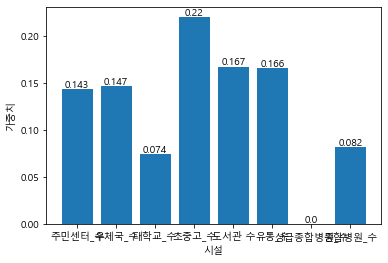

In [39]:
# 각 feature별 가중치 시각화
plt.bar(x, y)
plt.xlabel('시설')
plt.ylabel('가중치')

for i, v in enumerate(x):
    plt.text(v, y[i],round(y[i],3),                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 10, 
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom', # verticalalignment (top, center, bottom)
            )    
    
plt.savefig('AHP_결과/포항시_AHP_막대그래프',dpi=300) # 막대그래프 결과를 저장
plt.show()

In [40]:
# 포항시 읍면동의 인프라 데이터 불러오기
포항시_초중고 = pd.read_excel('../전처리된데이터/AHP/포항시_읍면동_인프라/포항시_읍면동_초중고.xlsx')
포항시_대학교 = pd.read_excel('../전처리된데이터/AHP/포항시_읍면동_인프라/포항시_읍면동_대학교.xlsx')
포항시_도서관 = pd.read_excel('../전처리된데이터/AHP/포항시_읍면동_인프라/포항시_읍면동_도서관.xlsx.')
포항시_상급종합병원 = pd.read_excel('../전처리된데이터/AHP/포항시_읍면동_인프라/포항시_읍면동_상급종합병원.xlsx')
포항시_종합병원 = pd.read_excel('../전처리된데이터/AHP/포항시_읍면동_인프라/포항시_읍면동_종합병원.xlsx')
포항시_우체국 = pd.read_excel('../전처리된데이터/AHP/포항시_읍면동_인프라/포항시_읍면동_우체국.xlsx')
포항시_유통 = pd.read_excel('../전처리된데이터/AHP/포항시_읍면동_인프라/포항시_읍면동_유통.xlsx')
포항시_주민센터 = pd.read_excel('../전처리된데이터/AHP/포항시_읍면동_인프라/포항시_읍면동_주민센터.xlsx')

In [41]:
# column 이름 변경
포항시_초중고.rename(columns = {'NUMPOINTS' : '초중고_수'}, inplace = True)
포항시_초중고 = 포항시_초중고[['EMD_NM', '초중고_수']]
포항시_초중고.head()

,EMD_NM,초중고_수
0,상도동,2
1,대도동,8
2,해도동,0
3,송도동,6
4,청림동,2


In [42]:
# column 이름 변경
포항시_대학교.rename(columns = {'Unnamed: 0' : 'EMD_CD', 'NUMPOINTS' : '대학교_수'}, inplace = True)
포항시_대학교 = 포항시_대학교[['EMD_NM', '대학교_수']]
포항시_대학교.head()

,EMD_NM,대학교_수
0,이동,0
1,대잠동,0
2,덕수동,0
3,해도동,0
4,우현동,0


In [43]:
# column 이름 변경
포항시_도서관.rename(columns = {'NUMPOINTS_SUM' : '도서관_수'}, inplace = True)
포항시_도서관 = 포항시_도서관[['EMD_NM', '도서관_수']]
포항시_도서관.head()

,EMD_NM,도서관_수
0,이동,1
1,대잠동,1
2,덕수동,1
3,해도동,1
4,우현동,1


In [44]:
# column 이름 변경
포항시_상급종합병원.rename(columns = {'NUMPOINTS' : '상급종합병원_수'}, inplace = True)
포항시_상급종합병원 = 포항시_상급종합병원[['EMD_NM', '상급종합병원_수']]
포항시_상급종합병원.head()

,EMD_NM,상급종합병원_수
0,이동,0
1,대잠동,0
2,덕수동,0
3,해도동,0
4,우현동,0


In [45]:
# column 이름 변경
포항시_종합병원.rename(columns = {'NUMPOINTS' : '종합병원_수'}, inplace = True)
포항시_종합병원 = 포항시_종합병원[['EMD_NM', '종합병원_수']]
포항시_종합병원.head()

,EMD_NM,종합병원_수
0,이동,1
1,대잠동,1
2,덕수동,0
3,해도동,0
4,우현동,0


In [46]:
# column 이름 변경
포항시_우체국.rename(columns = {'NUMPOINTS' : '우체국_수'}, inplace = True)
포항시_우체국 = 포항시_우체국[['EMD_NM', '우체국_수']]
포항시_우체국.head()

,EMD_NM,우체국_수
0,이동,0
1,대잠동,1
2,덕수동,0
3,해도동,0
4,우현동,0


In [47]:
# column 이름 변경
포항시_유통.rename(columns = {'NUMPOINTS' : '유통_수'}, inplace = True)
포항시_유통 = 포항시_유통[['EMD_NM', '유통_수']]
포항시_유통.head()

,EMD_NM,유통_수
0,이동,0
1,대잠동,1
2,덕수동,0
3,해도동,0
4,우현동,1


In [48]:
# column 이름 변경
포항시_주민센터.rename(columns = {'NUMPOINTS' : '주민센터_수'}, inplace = True)
포항시_주민센터 = 포항시_주민센터[['EMD_NM', '주민센터_수']]
포항시_주민센터.head()

,EMD_NM,주민센터_수
0,이동,0
1,대잠동,1
2,덕수동,0
3,해도동,1
4,우현동,1


merge (EMD_NM 기준)

In [49]:
tmp1 = pd.merge(포항시_초중고, 포항시_대학교, on = 'EMD_NM', how = 'inner')
tmp1.head()

,EMD_NM,초중고_수,대학교_수
0,상도동,2,0
1,대도동,8,0
2,해도동,0,0
3,송도동,6,0
4,청림동,2,0


In [50]:
tmp2 = pd.merge(포항시_도서관, 포항시_상급종합병원, on = 'EMD_NM', how = 'inner')
tmp2.head()

,EMD_NM,도서관_수,상급종합병원_수
0,이동,1,0
1,대잠동,1,0
2,덕수동,1,0
3,해도동,1,0
4,우현동,1,0


In [51]:
tmp3 = pd.merge(포항시_종합병원, 포항시_우체국, on = 'EMD_NM', how = 'inner')
tmp3.head()

,EMD_NM,종합병원_수,우체국_수
0,이동,1,0
1,대잠동,1,1
2,덕수동,0,0
3,해도동,0,0
4,우현동,0,0


In [52]:
tmp4 = pd.merge(포항시_유통, 포항시_주민센터, on = 'EMD_NM', how = 'inner')
tmp4.head()

,EMD_NM,유통_수,주민센터_수
0,이동,0,0
1,대잠동,1,1
2,덕수동,0,0
3,해도동,0,1
4,우현동,1,1


In [53]:
tmp11 = pd.merge(tmp1, tmp2, on = 'EMD_NM', how = 'inner')
tmp11.head()

,EMD_NM,초중고_수,대학교_수,도서관_수,상급종합병원_수
0,상도동,2,0,1,0
1,대도동,8,0,2,0
2,해도동,0,0,1,0
3,송도동,6,0,1,0
4,청림동,2,0,2,0


In [54]:
tmp22 =tmp22 = pd.merge(tmp3, tmp4, on = 'EMD_NM', how = 'inner')
tmp22.head()

,EMD_NM,종합병원_수,우체국_수,유통_수,주민센터_수
0,이동,1,0,0,0
1,대잠동,1,1,1,1
2,덕수동,0,0,0,0
3,해도동,0,0,0,1
4,우현동,0,0,1,1


In [55]:
tmp_a = pd.merge(tmp11, tmp22, on = 'EMD_NM', how = 'inner')
tmp_a.head()

,EMD_NM,초중고_수,대학교_수,도서관_수,상급종합병원_수,종합병원_수,우체국_수,유통_수,주민센터_수
0,상도동,2,0,1,0,0,1,0,1
1,대도동,8,0,2,0,1,1,0,0
2,해도동,0,0,1,0,0,0,0,1
3,송도동,6,0,1,0,0,1,0,1
4,청림동,2,0,2,0,0,1,0,1


In [56]:
# 포항시 인프라 시설 수 저장 (읍면동 단위)
포항시_인프라시설 = tmp_a
포항시_인프라시설.head()

,EMD_NM,초중고_수,대학교_수,도서관_수,상급종합병원_수,종합병원_수,우체국_수,유통_수,주민센터_수
0,상도동,2,0,1,0,0,1,0,1
1,대도동,8,0,2,0,1,1,0,0
2,해도동,0,0,1,0,0,0,0,1
3,송도동,6,0,1,0,0,1,0,1
4,청림동,2,0,2,0,0,1,0,1


In [57]:
포항시_인프라시설.rename(columns = {'EMD_NM' : '포항시'}, inplace = True)

In [58]:
포항시_인프라시설.head()

,포항시,초중고_수,대학교_수,도서관_수,상급종합병원_수,종합병원_수,우체국_수,유통_수,주민센터_수
0,상도동,2,0,1,0,0,1,0,1
1,대도동,8,0,2,0,1,1,0,0
2,해도동,0,0,1,0,0,0,0,1
3,송도동,6,0,1,0,0,1,0,1
4,청림동,2,0,2,0,0,1,0,1


로그 변환 (Log Scaling)

In [59]:
포항시_인프라시설_log = 포항시_인프라시설

In [60]:
포항시_인프라시설_log.columns

Index(['포항시', '초중고_수', '대학교_수', '도서관_수', '상급종합병원_수', '종합병원_수', '우체국_수', '유통_수',
       '주민센터_수'],
      dtype='object')

In [61]:
# 각 데이터를 log 변환
포항시_인프라시설_log['초중고_수'] = np.log1p(포항시_인프라시설_log['초중고_수'])
포항시_인프라시설_log['대학교_수'] = np.log1p(포항시_인프라시설_log['대학교_수'])
포항시_인프라시설_log['도서관_수'] = np.log1p(포항시_인프라시설_log['도서관_수'])
포항시_인프라시설_log['상급종합병원_수'] = np.log1p(포항시_인프라시설_log['상급종합병원_수'])
포항시_인프라시설_log['종합병원_수'] = np.log1p(포항시_인프라시설_log['종합병원_수'])
포항시_인프라시설_log['우체국_수'] = np.log1p(포항시_인프라시설_log['우체국_수'])
포항시_인프라시설_log['유통_수'] = np.log1p(포항시_인프라시설_log['유통_수'])
포항시_인프라시설_log['주민센터_수'] = np.log1p(포항시_인프라시설_log['주민센터_수'])

In [62]:
포항시_인프라시설_log

,포항시,초중고_수,대학교_수,도서관_수,상급종합병원_수,종합병원_수,우체국_수,유통_수,주민센터_수
0,상도동,1.098612,0.000000,0.693147,0.0,0.000000,0.693147,0.000000,0.693147
1,대도동,2.197225,0.000000,1.098612,0.0,0.693147,0.693147,0.000000,0.000000
2,해도동,0.000000,0.000000,0.693147,0.0,0.000000,0.000000,0.000000,0.693147
3,송도동,1.945910,0.000000,0.693147,0.0,0.000000,0.693147,0.000000,0.693147
4,청림동,1.098612,0.000000,1.098612,0.0,0.000000,0.693147,0.000000,0.693147
5,일월동,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
6,송내동,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
7,괴동동,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
8,동촌동,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
9,장흥동,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [63]:
# log 변환한 포항시 인프라시설 파일 반환 (읍면동 단위)
포항시_인프라시설_log.to_csv('AHP_결과/포항시_인프라시설.csv')

In [64]:
# 포항시 가중치 파일 반환 (읍면동 단위)
포항 = pd.read_csv('AHP_결과/포항시_가중치.csv', encoding = 'cp949')
포항

,Unnamed: 0,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
0,주민센터_수,1.000000,1.028023,0.473197,1.636047,1.193828,1.183510,0.0,0.526803
1,우체국_수,0.972741,1.000000,0.460299,1.591451,1.161285,1.151249,0.0,0.512443
2,대학교_수,2.113283,2.172502,1.000000,3.457431,2.522895,2.501092,0.0,1.113283
3,초중고_수,0.611229,0.628357,0.289232,1.000000,0.729702,0.723396,0.0,0.321997
4,도서관 수,0.837642,0.861115,0.396370,1.370422,1.000000,0.991358,0.0,0.441272
5,유통_수,0.844944,0.868622,0.399825,1.382369,1.008718,1.000000,0.0,0.445119
6,상급종합병원_수,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
7,종합병원_수,1.898244,1.951438,0.898244,3.105618,2.266176,2.246592,0.0,1.000000
8,기하평균,1.067640,1.093773,0.554737,1.642465,1.246662,1.237229,0.0,0.609350
9,가중치,0.143272,0.146779,0.074443,0.220410,0.167295,0.166030,0.0,0.081772


In [65]:
# 포항시 가중치 행 저장
포항_가중치 = 포항[포항['Unnamed: 0'] == '가중치']
포항_가중치

,Unnamed: 0,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
9,가중치,0.143272,0.146779,0.074443,0.22041,0.167295,0.16603,0.0,0.081772


In [66]:
# column 이름 변경
포항_가중치 = 포항_가중치.rename(columns = {'Unnamed: 0' : '포항시', '도서관 수' : '도서관_수'})
포항_가중치

,포항시,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수
9,가중치,0.143272,0.146779,0.074443,0.22041,0.167295,0.16603,0.0,0.081772


In [67]:
# 포항시를 index로 설정
포항_가중치.set_index('포항시', inplace = True)

In [68]:
포항_가중치.columns

Index(['주민센터_수', '우체국_수', '대학교_수', '초중고_수', '도서관_수', '유통_수', '상급종합병원_수',
       '종합병원_수'],
      dtype='object')

In [69]:
포항_가중치

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수
포항시,,,,,,,,
가중치,0.143272,0.146779,0.074443,0.22041,0.167295,0.16603,0.0,0.081772


In [70]:
columns_cnt = len(포항_가중치.columns)
columns_cnt

8

### 포항시_인프라시설 - 시설log

In [71]:
# 포항시 읍면동 단위로 log 변환된 시설 수 데이터 불러오기
포항시_인프라시설 = pd.read_csv('AHP_결과/포항시_인프라시설.csv')
포항시_인프라시설

,Unnamed: 0,포항시,초중고_수,대학교_수,도서관_수,상급종합병원_수,종합병원_수,우체국_수,유통_수,주민센터_수
0,0,상도동,1.098612,0.000000,0.693147,0.0,0.000000,0.693147,0.000000,0.693147
1,1,대도동,2.197225,0.000000,1.098612,0.0,0.693147,0.693147,0.000000,0.000000
2,2,해도동,0.000000,0.000000,0.693147,0.0,0.000000,0.000000,0.000000,0.693147
3,3,송도동,1.945910,0.000000,0.693147,0.0,0.000000,0.693147,0.000000,0.693147
4,4,청림동,1.098612,0.000000,1.098612,0.0,0.000000,0.693147,0.000000,0.693147
5,5,일월동,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
6,6,송내동,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
7,7,괴동동,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
8,8,동촌동,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
9,9,장흥동,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [72]:
# 필요한 column만 추출
포항시_인프라시설 = 포항시_인프라시설[['포항시', '주민센터_수', '우체국_수', '대학교_수', '초중고_수', '도서관_수', '유통_수', '상급종합병원_수','종합병원_수']]
포항시_인프라시설

,포항시,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수
0,상도동,0.693147,0.693147,0.000000,1.098612,0.693147,0.000000,0.0,0.000000
1,대도동,0.000000,0.693147,0.000000,2.197225,1.098612,0.000000,0.0,0.693147
2,해도동,0.693147,0.000000,0.000000,0.000000,0.693147,0.000000,0.0,0.000000
3,송도동,0.693147,0.693147,0.000000,1.945910,0.693147,0.000000,0.0,0.000000
4,청림동,0.693147,0.693147,0.000000,1.098612,1.098612,0.000000,0.0,0.000000
5,일월동,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,송내동,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,괴동동,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,동촌동,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,장흥동,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [73]:
# 포항시의 동 목록 확인
포항시_동 = 포항시_인프라시설[['포항시']]
포항시_동.head()

,포항시
0,상도동
1,대도동
2,해도동
3,송도동
4,청림동


In [74]:
포항시_인프라시설.columns

Index(['포항시', '주민센터_수', '우체국_수', '대학교_수', '초중고_수', '도서관_수', '유통_수', '상급종합병원_수',
       '종합병원_수'],
      dtype='object')

In [75]:
# 포항시로 index 설정
포항시_인프라시설.set_index('포항시', inplace = True)

In [76]:
포항시_인프라시설.head()

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수
포항시,,,,,,,,
상도동,0.693147,0.693147,0.0,1.098612,0.693147,0.0,0.0,0.000000
대도동,0.000000,0.693147,0.0,2.197225,1.098612,0.0,0.0,0.693147
해도동,0.693147,0.000000,0.0,0.000000,0.693147,0.0,0.0,0.000000
송도동,0.693147,0.693147,0.0,1.945910,0.693147,0.0,0.0,0.000000
청림동,0.693147,0.693147,0.0,1.098612,1.098612,0.0,0.0,0.000000


In [77]:
지역cnt = len(포항시_인프라시설)
지역cnt

53

## Ⅱ. 인프라시설 * 지역별 가중치 

#### (가장 점수가 높은 동을 선정하기)

In [78]:
포항시가중치 = pd.DataFrame(index = range(0, 지역cnt), columns = ['주민센터_수', '우체국_수', '대학교_수', '초중고_수', '도서관_수', '유통_수', '상급종합병원_수', '종합병원_수'])

In [79]:
# 포항시의 가중치 행렬에 각 가중치 * 개수 계산 후 저장 (AHP 수식)
for i in range(지역cnt):
    for j in range(columns_cnt):
        포항시가중치.iloc[i, j] = 포항_가중치.iloc[0, j] * 포항시_인프라시설.iloc[i, j]

In [80]:
포항시가중치.head()

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수
0,0.099308,0.101739,0.0,0.242145,0.11596,0.0,0.0,0.0
1,0.0,0.101739,0.0,0.484291,0.183793,0.0,0.0,0.05668
2,0.099308,0.0,0.0,0.0,0.11596,0.0,0.0,0.0
3,0.099308,0.101739,0.0,0.428899,0.11596,0.0,0.0,0.0
4,0.099308,0.101739,0.0,0.242145,0.183793,0.0,0.0,0.0


In [81]:
# sum을 통해 각 값의 합을 구함
포항시가중치['sum_a'] = 포항시가중치.sum(axis = 1)

In [82]:
포항시가중치.head()

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수,sum_a
0,0.099308,0.101739,0.0,0.242145,0.11596,0.0,0.0,0.0,0.559153
1,0.0,0.101739,0.0,0.484291,0.183793,0.0,0.0,0.05668,0.826503
2,0.099308,0.0,0.0,0.0,0.11596,0.0,0.0,0.0,0.215269
3,0.099308,0.101739,0.0,0.428899,0.11596,0.0,0.0,0.0,0.745906
4,0.099308,0.101739,0.0,0.242145,0.183793,0.0,0.0,0.0,0.626986


index 기준으로 merge (포항시_동, 포항시가중치)

In [83]:
포항시 = pd.merge(포항시_동, 포항시가중치, left_index=True, right_index=True, how='left')

In [84]:
포항시.head()

,포항시,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수,sum_a
0,상도동,0.099308,0.101739,0.0,0.242145,0.11596,0.0,0.0,0.0,0.559153
1,대도동,0.0,0.101739,0.0,0.484291,0.183793,0.0,0.0,0.05668,0.826503
2,해도동,0.099308,0.0,0.0,0.0,0.11596,0.0,0.0,0.0,0.215269
3,송도동,0.099308,0.101739,0.0,0.428899,0.11596,0.0,0.0,0.0,0.745906
4,청림동,0.099308,0.101739,0.0,0.242145,0.183793,0.0,0.0,0.0,0.626986


포항시_세부입지 (정렬)

In [85]:
포항시_세부입지 = 포항시.sort_values(by=["sum_a"], ascending=[False])

In [86]:
포항시_세부입지.set_index('포항시', inplace = True)

In [87]:
시설log_포항시_세부입지 = 포항시_세부입지

In [88]:
# 포항시 세부 입지 확인 (흥해읍, 오천읍, 연일읍)
시설log_포항시_세부입지

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수,sum_a
포항시,,,,,,,,,
흥해읍,0.099308,0.236231,0.1032,0.691095,0.269252,0.0,0.0,0.0,1.399086
오천읍,0.099308,0.161253,0.0,0.648984,0.269252,0.0,0.0,0.0,1.178797
연일읍,0.099308,0.101739,0.0,0.565341,0.183793,0.182402,0.0,0.0,1.132584
용흥동,0.099308,0.101739,0.0,0.671044,0.183793,0.0,0.0,0.05668,1.112564
양덕동,0.0,0.101739,0.0,0.484291,0.367586,0.115083,0.0,0.0,1.068699
장성동,0.099308,0.101739,0.0,0.565341,0.183793,0.115083,0.0,0.0,1.065265
죽도동,0.099308,0.0,0.0,0.484291,0.183793,0.267215,0.0,0.0,1.034607
우현동,0.099308,0.0,0.0,0.671044,0.11596,0.115083,0.0,0.0,1.001396
청하면,0.099308,0.161253,0.0,0.428899,0.11596,0.182402,0.0,0.0,0.987822


시설log-포항시_세부입지

In [89]:
# 포항시 세부 입지 파일 반환
시설log_포항시_세부입지.to_csv('AHP_결과/포항시_세부입지.csv')

# 구미시 

In [90]:
# 구미시 데이터만 추출
idx = 시군구별_인프라[시군구별_인프라['시군구명'] != '구미시'].index
구미시_인프라 = 시군구별_인프라.drop(idx)
구미시_인프라

,법정동코드,시도명,시군구명,주민센터_수,우체국_수,대학교_수,초중고_수,대중교통_만족도,도서관_수,문화시설_수,유통시설_수,상급종합병원_수,종합병원_수
190,4719000000,경상북도,구미시,3.258097,3.135494,1.609438,5.313206,1.702685,3.912023,2.484907,2.484907,0.0,1.386294


In [91]:
구미시_인프라.sum()

법정동코드       4719000000
시도명               경상북도
시군구명               구미시
주민센터_수        3.258097
우체국_수         3.135494
대학교_수         1.609438
초중고_수         5.313206
대중교통_만족도      1.702685
도서관_수         3.912023
문화시설_수        2.484907
유통시설_수        2.484907
상급종합병원_수           0.0
종합병원_수        1.386294
dtype: object

In [92]:
# 구미시의 법정동코드 저장
구미시_법정동코드 = 구미시_인프라.iloc[:, :1]
구미시_법정동코드

,법정동코드
190,4719000000


In [93]:
# 필요한 column만 추출
구미시_비교항목 = 구미시_인프라.drop(labels = ['법정동코드', '시도명', '시군구명', '대중교통_만족도', '문화시설_수'], axis = 1)
구미시_비교항목

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통시설_수,상급종합병원_수,종합병원_수
190,3.258097,3.135494,1.609438,5.313206,3.912023,2.484907,0.0,1.386294


## Ⅱ. 쌍대비교행렬 만들기

### 1) 구미시 쌍대비교행렬

In [94]:
구미sum = 구미시_비교항목
구미sum

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통시설_수,상급종합병원_수,종합병원_수
190,3.258097,3.135494,1.609438,5.313206,3.912023,2.484907,0.0,1.386294


In [95]:
# 데이터프레임의 컬럼수 파악
구미sum_col_cnt = len(구미sum.columns)
구미sum_col_cnt

8

In [96]:
# 쌍대비교행렬을 저장할 빈 프레임 만들기 : ahp_구미sum
ahp_구미sum = pd.DataFrame(index = range(0, 구미sum_col_cnt), columns = ['주민센터_수', '우체국_수', '대학교_수', '초중고_수', '도서관 수', '유통_수', '상급종합병원_수', '종합병원_수'])
ahp_구미sum

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
ahp_구미sum = ahp_구미sum.astype(float)
# ahp_구미sum

In [98]:
#쌍대비교행렬 제작
for i in range(구미sum_col_cnt):
    for j in range(구미sum_col_cnt):
        if(구미sum.iloc[0, j] == 0):
            ahp_구미sum.iloc[j, i] = 1
        else:
            ahp_구미sum.iloc[j, i] = 구미sum.iloc[0, i]/구미sum.iloc[0, j]

In [99]:
ahp_구미sum

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
0,1.000000,0.962370,0.493981,1.630770,1.200708,0.762687,0.0,0.425492
1,1.039101,1.000000,0.513296,1.694535,1.247658,0.792509,0.0,0.442129
2,2.024369,1.948192,1.000000,3.301280,2.430677,1.543959,0.0,0.861353
3,0.613207,0.590132,0.302913,1.000000,0.736283,0.467685,0.0,0.260915
4,0.832842,0.801502,0.411408,1.358174,1.000000,0.635197,0.0,0.354368
5,1.311155,1.261816,0.647685,2.138191,1.574314,1.000000,0.0,0.557886
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
7,2.350220,2.261781,1.160964,3.832668,2.821928,1.792481,0.0,1.000000


In [100]:
ahp_구미sum.isnull().sum()

주민센터_수      0
우체국_수       0
대학교_수       0
초중고_수       0
도서관 수       0
유통_수        0
상급종합병원_수    0
종합병원_수      0
dtype: int64

## Ⅲ. AHP

In [101]:
ahp_df = ahp_구미sum
ahp_df

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
0,1.000000,0.962370,0.493981,1.630770,1.200708,0.762687,0.0,0.425492
1,1.039101,1.000000,0.513296,1.694535,1.247658,0.792509,0.0,0.442129
2,2.024369,1.948192,1.000000,3.301280,2.430677,1.543959,0.0,0.861353
3,0.613207,0.590132,0.302913,1.000000,0.736283,0.467685,0.0,0.260915
4,0.832842,0.801502,0.411408,1.358174,1.000000,0.635197,0.0,0.354368
5,1.311155,1.261816,0.647685,2.138191,1.574314,1.000000,0.0,0.557886
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
7,2.350220,2.261781,1.160964,3.832668,2.821928,1.792481,0.0,1.000000


In [102]:
# 데이터프레임의 컬럼수 파악
colums_cnt = len(ahp_df.columns)
colums_cnt

8

In [103]:
# 각 컬럼의 기하평균을 계산하여 리스트에 저장
geo_mean_list = []
for i in ahp_df:
    geo_mean_list.append(gmean(ahp_df[i]))

In [104]:
# 기하평균 출력
print('기하평균 (Geometric mean)\n')
for i,j in zip(ahp_df, geo_mean_list):
    print('{} : {}'.format(i, j))
    #print('{} : {}'.format(i, round(j,3)))  # 소수점 3 자리수

기하평균 (Geometric mean)

주민센터_수 : 1.1614084564400309
우체국_수 : 1.123076351681359
대학교_수 : 0.6265871412617249
초중고_수 : 1.7816754677719429
도서관 수 : 1.3629902655307715
유통_수 : 0.9163003396481516
상급종합병원_수 : 0.0
종합병원_수 : 0.5498763657603678


In [105]:
# 데이터프레임에 기하평균값 추가
ahp_df = ahp_df.append(pd.Series(geo_mean_list, index=ahp_df.columns),ignore_index=True)
ahp_df

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
0,1.000000,0.962370,0.493981,1.630770,1.200708,0.762687,0.0,0.425492
1,1.039101,1.000000,0.513296,1.694535,1.247658,0.792509,0.0,0.442129
2,2.024369,1.948192,1.000000,3.301280,2.430677,1.543959,0.0,0.861353
3,0.613207,0.590132,0.302913,1.000000,0.736283,0.467685,0.0,0.260915
4,0.832842,0.801502,0.411408,1.358174,1.000000,0.635197,0.0,0.354368
5,1.311155,1.261816,0.647685,2.138191,1.574314,1.000000,0.0,0.557886
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
7,2.350220,2.261781,1.160964,3.832668,2.821928,1.792481,0.0,1.000000
8,1.161408,1.123076,0.626587,1.781675,1.362990,0.916300,0.0,0.549876


In [106]:
# 가중치 계산을 위하여 기하평균의 합을 구함
geo_mean_sum = sum(geo_mean_list)
geo_mean_sum

7.521914388094349

In [107]:
# 각 컬럼의 가중치를 계산하여 리스트에 저장
weights_list = []
for i in range(colums_cnt):
    weights_list.append(geo_mean_list[i]/geo_mean_sum)

In [108]:
# 기하평균 출력
print('가중치 (Weights)\n')
for i,j in zip(ahp_df, weights_list):
    print('{} : {}'.format(i, j))
    #print('{} : {}'.format(i, round(j,3)))  # 소수점 3 자리수

가중치 (Weights)

주민센터_수 : 0.1544033069930047
우체국_수 : 0.14930724995474012
대학교_수 : 0.08330155183014101
초중고_수 : 0.23686462991282783
도서관 수 : 0.1812025762601215
유통_수 : 0.12181743800467437
상급종합병원_수 : 0.0
종합병원_수 : 0.07310324704449037


In [109]:
# 가중치 합 확인
su_ = sum(list(weights_list))
print(su_)

0.9999999999999999


In [110]:
# 데이터프레임에 가중치 값 추가
ahp_df = ahp_df.append(pd.Series(weights_list, index=ahp_df.columns),ignore_index=True)
ahp_df

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
0,1.000000,0.962370,0.493981,1.630770,1.200708,0.762687,0.0,0.425492
1,1.039101,1.000000,0.513296,1.694535,1.247658,0.792509,0.0,0.442129
2,2.024369,1.948192,1.000000,3.301280,2.430677,1.543959,0.0,0.861353
3,0.613207,0.590132,0.302913,1.000000,0.736283,0.467685,0.0,0.260915
4,0.832842,0.801502,0.411408,1.358174,1.000000,0.635197,0.0,0.354368
5,1.311155,1.261816,0.647685,2.138191,1.574314,1.000000,0.0,0.557886
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
7,2.350220,2.261781,1.160964,3.832668,2.821928,1.792481,0.0,1.000000
8,1.161408,1.123076,0.626587,1.781675,1.362990,0.916300,0.0,0.549876
9,0.154403,0.149307,0.083302,0.236865,0.181203,0.121817,0.0,0.073103


In [111]:
ahp_df.columns

Index(['주민센터_수', '우체국_수', '대학교_수', '초중고_수', '도서관 수', '유통_수', '상급종합병원_수',
       '종합병원_수'],
      dtype='object')

In [112]:
# 인덱스명 변경
ahp_df_result = ahp_df.rename({0:'주민센터_수', 1:'우체국_수', 2:'대학교_수', 3:'초중고_수', 4:'도서관 수', 5:'유통_수', 6:'상급종합병원_수', 7:'종합병원_수', 8:'기하평균', 9:'가중치'}, axis=0)
ahp_df_result

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
주민센터_수,1.000000,0.962370,0.493981,1.630770,1.200708,0.762687,0.0,0.425492
우체국_수,1.039101,1.000000,0.513296,1.694535,1.247658,0.792509,0.0,0.442129
대학교_수,2.024369,1.948192,1.000000,3.301280,2.430677,1.543959,0.0,0.861353
초중고_수,0.613207,0.590132,0.302913,1.000000,0.736283,0.467685,0.0,0.260915
도서관 수,0.832842,0.801502,0.411408,1.358174,1.000000,0.635197,0.0,0.354368
유통_수,1.311155,1.261816,0.647685,2.138191,1.574314,1.000000,0.0,0.557886
상급종합병원_수,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
종합병원_수,2.350220,2.261781,1.160964,3.832668,2.821928,1.792481,0.0,1.000000
기하평균,1.161408,1.123076,0.626587,1.781675,1.362990,0.916300,0.0,0.549876
가중치,0.154403,0.149307,0.083302,0.236865,0.181203,0.121817,0.0,0.073103


In [113]:
# 데이터프레임을 csv로 저장
ahp_df_result.to_csv('AHP_결과/구미시_가중치.csv',index=True , sep=',', encoding='cp949')

In [114]:
# 가중치 결과만 가지고 있는 데이터프레임 생성
ahp_df_result_weights = ahp_df_result.loc[['가중치'],['주민센터_수', '우체국_수', '대학교_수', '초중고_수', '도서관 수',
       '유통_수', '상급종합병원_수', '종합병원_수']]
ahp_df_result_weights

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
가중치,0.154403,0.149307,0.083302,0.236865,0.181203,0.121817,0.0,0.073103


In [115]:
ahp_df_result_weights.T

,가중치
주민센터_수,0.154403
우체국_수,0.149307
대학교_수,0.083302
초중고_수,0.236865
도서관 수,0.181203
유통_수,0.121817
상급종합병원_수,0.000000
종합병원_수,0.073103


### 리스트를 matplotlib으로 막대그래프를 생성

#### 가중치를 변수별로 보고싶을 경우

In [116]:
x = list(ahp_df_result_weights.columns)
y = weights_list

In [117]:
# 그래프 한글 출력을 위함
plt.rcParams['font.family'] = 'Malgun Gothic' 

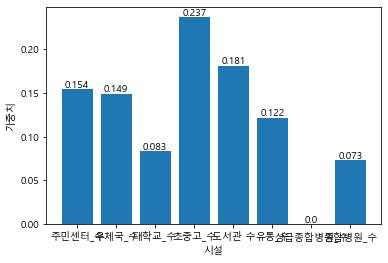

In [118]:
# 각 feature별 가중치 파악
plt.bar(x, y)
plt.xlabel('시설')
plt.ylabel('가중치')


for i, v in enumerate(x):
    plt.text(v, y[i],round(y[i],3),                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 10, 
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom', # verticalalignment (top, center, bottom)
            )    
    
plt.savefig('AHP_결과/구미시_AHP_막대그래프',dpi=300) # 막대그래프 결과를 저장
plt.show()

In [119]:
# 구미시 인프라 데이터 불러오기 (읍면동 단위)
초중고 = pd.read_excel('../전처리된데이터/AHP/구미시_읍면동_인프라/구미시_읍면동_초중고.xlsx')
대학교 = pd.read_excel('../전처리된데이터/AHP/구미시_읍면동_인프라/구미시_읍면동_대학교.xlsx')
도서관 = pd.read_excel('../전처리된데이터/AHP/구미시_읍면동_인프라/구미시_읍면동_도서관.xlsx.')
상급종합병원 = pd.read_excel('../전처리된데이터/AHP/구미시_읍면동_인프라/구미시_읍면동_상급종합병원.xlsx')
종합병원 = pd.read_excel('../전처리된데이터/AHP/구미시_읍면동_인프라/구미시_읍면동_종합병원.xlsx')
우체국 = pd.read_excel('../전처리된데이터/AHP/구미시_읍면동_인프라/구미시_읍면동_우체국.xlsx')
유통 = pd.read_excel('../전처리된데이터/AHP/구미시_읍면동_인프라/구미시_읍면동_유통.xlsx')
주민센터 = pd.read_excel('../전처리된데이터/AHP/구미시_읍면동_인프라/구미시_읍면동_주민센터.xlsx')

In [120]:
# column 이름 변경
초중고.rename(columns = {'NUMPOINTS' : '초중고_수'}, inplace = True)
초중고 = 초중고[['EMD_NM', '초중고_수']]
초중고.head()

,EMD_NM,초중고_수
0,원평동,6
1,지산동,4
2,도량동,18
3,봉곡동,14
4,부곡동,0


In [121]:
대학교.rename(columns = {'Unnamed: 0' : 'EMD_CD', 'NUMPOINTS' : '대학교_수'}, inplace = True)
대학교 = 대학교[['EMD_NM', '대학교_수']]
대학교.head()

,EMD_NM,대학교_수
0,산동읍,1
1,금전동,0
2,송정동,0
3,구포동,0
4,옥계동,0


In [122]:
도서관.rename(columns = {'NUMPOINTS_SUM' : '도서관_수'}, inplace = True)
도서관 = 도서관[['EMD_NM', '도서관_수']]
도서관.head()

,EMD_NM,도서관_수
0,산동읍,0
1,금전동,0
2,송정동,0
3,구포동,1
4,옥계동,3


In [123]:
상급종합병원.rename(columns = {'NUMPOINTS' : '상급종합병원_수'}, inplace = True)
상급종합병원 = 상급종합병원[['EMD_NM', '상급종합병원_수']]
상급종합병원.head()

,EMD_NM,상급종합병원_수
0,산동읍,0
1,금전동,0
2,송정동,0
3,구포동,0
4,옥계동,0


In [124]:
종합병원.rename(columns = {'NUMPOINTS' : '종합병원_수'}, inplace = True)
종합병원 = 종합병원[['EMD_NM', '종합병원_수']]
종합병원.head()

,EMD_NM,종합병원_수
0,산동읍,0
1,금전동,0
2,송정동,0
3,구포동,0
4,옥계동,0


In [125]:
우체국.rename(columns = {'NUMPOINTS' : '우체국_수'}, inplace = True)
우체국 = 우체국[['EMD_NM', '우체국_수']]
우체국.head()

,EMD_NM,우체국_수
0,산동읍,1
1,금전동,0
2,송정동,1
3,구포동,0
4,옥계동,1


In [126]:
유통.rename(columns = {'NUMPOINTS' : '유통_수'}, inplace = True)
유통 = 유통[['EMD_NM', '유통_수']]
유통.head()

,EMD_NM,유통_수
0,산동읍,0
1,금전동,0
2,송정동,2
3,구포동,1
4,옥계동,0


In [127]:
주민센터.rename(columns = {'NUMPOINTS' : '주민센터_수'}, inplace = True)
주민센터 = 주민센터[['EMD_NM', '주민센터_수']]
주민센터.head()

,EMD_NM,주민센터_수
0,산동읍,1
1,금전동,0
2,송정동,1
3,구포동,0
4,옥계동,1


merge (EMD_NM 기준)

In [128]:
tmp1 = pd.merge(초중고, 대학교, on = 'EMD_NM', how = 'inner')
tmp1.head()

,EMD_NM,초중고_수,대학교_수
0,원평동,6,0
1,지산동,4,0
2,도량동,18,0
3,봉곡동,14,0
4,부곡동,0,1


In [129]:
tmp2 = pd.merge(도서관, 상급종합병원, on = 'EMD_NM', how = 'inner')
tmp2.head()

,EMD_NM,도서관_수,상급종합병원_수
0,산동읍,0,0
1,금전동,0,0
2,송정동,0,0
3,구포동,1,0
4,옥계동,3,0


In [130]:
tmp3 = pd.merge(종합병원, 우체국, on = 'EMD_NM', how = 'inner')
tmp3.head()

,EMD_NM,종합병원_수,우체국_수
0,산동읍,0,1
1,금전동,0,0
2,송정동,0,1
3,구포동,0,0
4,옥계동,0,1


In [131]:
tmp4 = pd.merge(유통, 주민센터, on = 'EMD_NM', how = 'inner')
tmp4.head()

,EMD_NM,유통_수,주민센터_수
0,산동읍,0,1
1,금전동,0,0
2,송정동,2,1
3,구포동,1,0
4,옥계동,0,1


In [132]:
tmp11 = pd.merge(tmp1, tmp2, on = 'EMD_NM', how = 'inner')
tmp11.head()

,EMD_NM,초중고_수,대학교_수,도서관_수,상급종합병원_수
0,원평동,6,0,2,0
1,지산동,4,0,0,0
2,도량동,18,0,9,0
3,봉곡동,14,0,7,0
4,부곡동,0,1,0,0


In [133]:
tmp22 =tmp22 = pd.merge(tmp3, tmp4, on = 'EMD_NM', how = 'inner')
tmp22.head()

,EMD_NM,종합병원_수,우체국_수,유통_수,주민센터_수
0,산동읍,0,1,0,1
1,금전동,0,0,0,0
2,송정동,0,1,2,1
3,구포동,0,0,1,0
4,옥계동,0,1,0,1


In [134]:
tmp_a = pd.merge(tmp11, tmp22, on = 'EMD_NM', how = 'inner')
tmp_a.head()

,EMD_NM,초중고_수,대학교_수,도서관_수,상급종합병원_수,종합병원_수,우체국_수,유통_수,주민센터_수
0,원평동,6,0,2,0,0,1,1,1
1,지산동,4,0,0,0,0,0,0,1
2,도량동,18,0,9,0,0,1,0,1
3,봉곡동,14,0,7,0,0,1,1,1
4,부곡동,0,1,0,0,0,0,0,0


In [135]:
인프라시설 = tmp_a
인프라시설.head()

,EMD_NM,초중고_수,대학교_수,도서관_수,상급종합병원_수,종합병원_수,우체국_수,유통_수,주민센터_수
0,원평동,6,0,2,0,0,1,1,1
1,지산동,4,0,0,0,0,0,0,1
2,도량동,18,0,9,0,0,1,0,1
3,봉곡동,14,0,7,0,0,1,1,1
4,부곡동,0,1,0,0,0,0,0,0


In [136]:
인프라시설.rename(columns = {'EMD_NM' : '구미시'}, inplace = True)

In [137]:
구미시_인프라시설 = 인프라시설
구미시_인프라시설.head()

,구미시,초중고_수,대학교_수,도서관_수,상급종합병원_수,종합병원_수,우체국_수,유통_수,주민센터_수
0,원평동,6,0,2,0,0,1,1,1
1,지산동,4,0,0,0,0,0,0,1
2,도량동,18,0,9,0,0,1,0,1
3,봉곡동,14,0,7,0,0,1,1,1
4,부곡동,0,1,0,0,0,0,0,0


로그 변환 (Log Scaling)

In [138]:
구미시_인프라시설_log = 구미시_인프라시설

In [139]:
구미시_인프라시설_log.columns

Index(['구미시', '초중고_수', '대학교_수', '도서관_수', '상급종합병원_수', '종합병원_수', '우체국_수', '유통_수',
       '주민센터_수'],
      dtype='object')

In [140]:
# 각 인프라 수에 log 변환 적용
구미시_인프라시설_log['초중고_수'] = np.log1p(구미시_인프라시설_log['초중고_수'])
구미시_인프라시설_log['대학교_수'] = np.log1p(구미시_인프라시설_log['대학교_수'])
구미시_인프라시설_log['도서관_수'] = np.log1p(구미시_인프라시설_log['도서관_수'])
구미시_인프라시설_log['상급종합병원_수'] = np.log1p(구미시_인프라시설_log['상급종합병원_수'])
구미시_인프라시설_log['종합병원_수'] = np.log1p(구미시_인프라시설_log['종합병원_수'])
구미시_인프라시설_log['우체국_수'] = np.log1p(구미시_인프라시설_log['우체국_수'])
구미시_인프라시설_log['유통_수'] = np.log1p(구미시_인프라시설_log['유통_수'])
구미시_인프라시설_log['주민센터_수'] = np.log1p(구미시_인프라시설_log['주민센터_수'])

In [141]:
구미시_인프라시설_log

,구미시,초중고_수,대학교_수,도서관_수,상급종합병원_수,종합병원_수,우체국_수,유통_수,주민센터_수
0,원평동,1.945910,0.000000,1.098612,0.0,0.000000,0.693147,0.693147,0.693147
1,지산동,1.609438,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.693147
2,도량동,2.944439,0.000000,2.302585,0.0,0.000000,0.693147,0.000000,0.693147
3,봉곡동,2.708050,0.000000,2.079442,0.0,0.000000,0.693147,0.693147,0.693147
4,부곡동,0.000000,0.693147,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
5,선기동,0.000000,0.000000,0.693147,0.0,0.000000,0.000000,0.000000,0.000000
6,수점동,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
7,남통동,1.609438,0.000000,1.098612,0.0,0.000000,0.000000,0.000000,0.000000
8,형곡동,2.708050,0.000000,1.098612,0.0,0.693147,0.693147,0.693147,1.098612
9,송정동,1.609438,0.000000,0.000000,0.0,0.000000,0.693147,1.098612,0.693147


In [142]:
# 구미시_인프라시설 파일 반환
구미시_인프라시설.to_csv('AHP_결과/구미시_인프라시설.csv')

In [143]:
# 구미시 가중치 불러오기
구미 = pd.read_csv('AHP_결과/구미시_가중치.csv', encoding = 'cp949')
구미

,Unnamed: 0,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
0,주민센터_수,1.000000,0.962370,0.493981,1.630770,1.200708,0.762687,0.0,0.425492
1,우체국_수,1.039101,1.000000,0.513296,1.694535,1.247658,0.792509,0.0,0.442129
2,대학교_수,2.024369,1.948192,1.000000,3.301280,2.430677,1.543959,0.0,0.861353
3,초중고_수,0.613207,0.590132,0.302913,1.000000,0.736283,0.467685,0.0,0.260915
4,도서관 수,0.832842,0.801502,0.411408,1.358174,1.000000,0.635197,0.0,0.354368
5,유통_수,1.311155,1.261816,0.647685,2.138191,1.574314,1.000000,0.0,0.557886
6,상급종합병원_수,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
7,종합병원_수,2.350220,2.261781,1.160964,3.832668,2.821928,1.792481,0.0,1.000000
8,기하평균,1.161408,1.123076,0.626587,1.781675,1.362990,0.916300,0.0,0.549876
9,가중치,0.154403,0.149307,0.083302,0.236865,0.181203,0.121817,0.0,0.073103


In [144]:
# 가중치 행만 추출
구미_가중치 = 구미[구미['Unnamed: 0'] == '가중치']
구미_가중치

,Unnamed: 0,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
9,가중치,0.154403,0.149307,0.083302,0.236865,0.181203,0.121817,0.0,0.073103


In [145]:
# column 이름 변경
구미_가중치 = 구미_가중치.rename(columns = {'Unnamed: 0' : '구미시', '도서관 수' : '도서관_수'})
구미_가중치

,구미시,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수
9,가중치,0.154403,0.149307,0.083302,0.236865,0.181203,0.121817,0.0,0.073103


In [146]:
# 구미시로 index 설정
구미_가중치.set_index('구미시', inplace = True)

In [147]:
구미_가중치.columns

Index(['주민센터_수', '우체국_수', '대학교_수', '초중고_수', '도서관_수', '유통_수', '상급종합병원_수',
       '종합병원_수'],
      dtype='object')

In [148]:
구미_가중치

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수
구미시,,,,,,,,
가중치,0.154403,0.149307,0.083302,0.236865,0.181203,0.121817,0.0,0.073103


In [149]:
columns_cnt = len(구미_가중치.columns)
columns_cnt

8

### 구미시_인프라시설 - 시설log

In [150]:
# 구미시 인프라시설 데이터 불러오기
구미시_인프라시설 = pd.read_csv('AHP_결과/구미시_인프라시설.csv')
구미시_인프라시설

,Unnamed: 0,구미시,초중고_수,대학교_수,도서관_수,상급종합병원_수,종합병원_수,우체국_수,유통_수,주민센터_수
0,0,원평동,1.945910,0.000000,1.098612,0.0,0.000000,0.693147,0.693147,0.693147
1,1,지산동,1.609438,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.693147
2,2,도량동,2.944439,0.000000,2.302585,0.0,0.000000,0.693147,0.000000,0.693147
3,3,봉곡동,2.708050,0.000000,2.079442,0.0,0.000000,0.693147,0.693147,0.693147
4,4,부곡동,0.000000,0.693147,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
5,5,선기동,0.000000,0.000000,0.693147,0.0,0.000000,0.000000,0.000000,0.000000
6,6,수점동,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
7,7,남통동,1.609438,0.000000,1.098612,0.0,0.000000,0.000000,0.000000,0.000000
8,8,형곡동,2.708050,0.000000,1.098612,0.0,0.693147,0.693147,0.693147,1.098612
9,9,송정동,1.609438,0.000000,0.000000,0.0,0.000000,0.693147,1.098612,0.693147


In [151]:
# 필요한 column만 추출
구미시_인프라시설 = 구미시_인프라시설[['구미시', '주민센터_수', '우체국_수', '대학교_수', '초중고_수', '도서관_수', '유통_수', '상급종합병원_수','종합병원_수']]
구미시_인프라시설

,구미시,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수
0,원평동,0.693147,0.693147,0.000000,1.945910,1.098612,0.693147,0.0,0.000000
1,지산동,0.693147,0.000000,0.000000,1.609438,0.000000,0.000000,0.0,0.000000
2,도량동,0.693147,0.693147,0.000000,2.944439,2.302585,0.000000,0.0,0.000000
3,봉곡동,0.693147,0.693147,0.000000,2.708050,2.079442,0.693147,0.0,0.000000
4,부곡동,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.0,0.000000
5,선기동,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.0,0.000000
6,수점동,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,남통동,0.000000,0.000000,0.000000,1.609438,1.098612,0.000000,0.0,0.000000
8,형곡동,1.098612,0.693147,0.000000,2.708050,1.098612,0.693147,0.0,0.693147
9,송정동,0.693147,0.693147,0.000000,1.609438,0.000000,1.098612,0.0,0.000000


In [152]:
# 구미시 동 확인
구미시_동 = 구미시_인프라시설[['구미시']]
구미시_동.head()

,구미시
0,원평동
1,지산동
2,도량동
3,봉곡동
4,부곡동


In [153]:
구미시_인프라시설.columns

Index(['구미시', '주민센터_수', '우체국_수', '대학교_수', '초중고_수', '도서관_수', '유통_수', '상급종합병원_수',
       '종합병원_수'],
      dtype='object')

In [154]:
# 구미시로 index 설정
구미시_인프라시설.set_index('구미시', inplace = True)

In [155]:
구미시_인프라시설.head()

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수
구미시,,,,,,,,
원평동,0.693147,0.693147,0.000000,1.945910,1.098612,0.693147,0.0,0.0
지산동,0.693147,0.000000,0.000000,1.609438,0.000000,0.000000,0.0,0.0
도량동,0.693147,0.693147,0.000000,2.944439,2.302585,0.000000,0.0,0.0
봉곡동,0.693147,0.693147,0.000000,2.708050,2.079442,0.693147,0.0,0.0
부곡동,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.0,0.0


In [156]:
지역cnt = len(구미시_인프라시설)
지역cnt

37

## Ⅱ. 인프라시설 * 지역별 가중치 

#### (가장 점수가 높은 동을 선정하기)

In [157]:
구미시가중치 = pd.DataFrame(index = range(0, 지역cnt), columns = ['주민센터_수', '우체국_수', '대학교_수', '초중고_수', '도서관_수', '유통_수', '상급종합병원_수', '종합병원_수'])

In [158]:
# 구미시 (가중치 * 인프라시설 수)를 통해 AHP 분석 시행
for i in range(지역cnt):
    for j in range(columns_cnt):
        구미시가중치.iloc[i, j] = 구미_가중치.iloc[0, j] * 구미시_인프라시설.iloc[i, j]

In [159]:
구미시가중치.head()

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수
0,0.107024,0.103492,0.0,0.460917,0.199071,0.084437,0.0,0.0
1,0.107024,0.0,0.0,0.381219,0.0,0.0,0.0,0.0
2,0.107024,0.103492,0.0,0.697433,0.417234,0.0,0.0,0.0
3,0.107024,0.103492,0.0,0.641441,0.3768,0.084437,0.0,0.0
4,0.0,0.0,0.05774,0.0,0.0,0.0,0.0,0.0


In [160]:
# 합계를 sum_a에 저장
구미시가중치['sum_a'] = 구미시가중치.sum(axis = 1)

In [161]:
구미시가중치.head()

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수,sum_a
0,0.107024,0.103492,0.0,0.460917,0.199071,0.084437,0.0,0.0,0.954942
1,0.107024,0.0,0.0,0.381219,0.0,0.0,0.0,0.0,0.488243
2,0.107024,0.103492,0.0,0.697433,0.417234,0.0,0.0,0.0,1.325184
3,0.107024,0.103492,0.0,0.641441,0.3768,0.084437,0.0,0.0,1.313195
4,0.0,0.0,0.05774,0.0,0.0,0.0,0.0,0.0,0.057740


index 기준으로 merge (구미시_동, 구미시가중치)

In [162]:
구미시 = pd.merge(구미시_동, 구미시가중치, left_index=True, right_index=True, how='left')

In [163]:
구미시.head()

,구미시,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수,sum_a
0,원평동,0.107024,0.103492,0.0,0.460917,0.199071,0.084437,0.0,0.0,0.954942
1,지산동,0.107024,0.0,0.0,0.381219,0.0,0.0,0.0,0.0,0.488243
2,도량동,0.107024,0.103492,0.0,0.697433,0.417234,0.0,0.0,0.0,1.325184
3,봉곡동,0.107024,0.103492,0.0,0.641441,0.3768,0.084437,0.0,0.0,1.313195
4,부곡동,0.0,0.0,0.05774,0.0,0.0,0.0,0.0,0.0,0.057740


구미시_세부입지 (정렬)

In [164]:
구미시_세부입지 = 구미시.sort_values(by=["sum_a"], ascending=[False])

In [165]:
구미시_세부입지.set_index('구미시', inplace = True)

In [166]:
시설log_구미시_세부입지 = 구미시_세부입지

In [167]:
# 구미시 세부 입지 선정 결과 확인 (도량동, 봉곡동, 고아읍)
시설log_구미시_세부입지

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수,sum_a
구미시,,,,,,,,,
도량동,0.107024,0.103492,0.0,0.697433,0.417234,0.0,0.0,0.0,1.325184
봉곡동,0.107024,0.103492,0.0,0.641441,0.3768,0.084437,0.0,0.0,1.313195
고아읍,0.107024,0.164031,0.0,0.641441,0.3768,0.0,0.0,0.0,1.289296
형곡동,0.169629,0.103492,0.0,0.641441,0.199071,0.084437,0.0,0.050671,1.248743
옥계동,0.107024,0.103492,0.0,0.607546,0.2512,0.0,0.0,0.0,1.069262
공단동,0.169629,0.164031,0.05774,0.381219,0.199071,0.0,0.0,0.050671,1.022362
원평동,0.107024,0.103492,0.0,0.460917,0.199071,0.084437,0.0,0.0,0.954942
선산읍,0.107024,0.103492,0.0,0.460917,0.199071,0.084437,0.0,0.0,0.954942
산동읍,0.107024,0.103492,0.05774,0.641441,0.0,0.0,0.0,0.0,0.909698


시설log-구미시_세부입지

In [168]:
시설log_구미시_세부입지.to_csv('AHP_결과/구미시_세부입지.csv')

# 사천시 

In [169]:
idx = 시군구별_인프라[시군구별_인프라['시군구명'] != '사천시'].index
사천시_인프라 = 시군구별_인프라.drop(idx)
사천시_인프라

,법정동코드,시도명,시군구명,주민센터_수,우체국_수,대학교_수,초중고_수,대중교통_만족도,도서관_수,문화시설_수,유통시설_수,상급종합병원_수,종합병원_수
212,4824000000,경상남도,사천시,2.70805,2.564949,0.693147,4.369448,1.721099,3.295837,2.197225,2.197225,0.0,0.0


In [170]:
사천시_인프라.sum()

법정동코드       4824000000
시도명               경상남도
시군구명               사천시
주민센터_수         2.70805
우체국_수         2.564949
대학교_수         0.693147
초중고_수         4.369448
대중교통_만족도      1.721099
도서관_수         3.295837
문화시설_수        2.197225
유통시설_수        2.197225
상급종합병원_수           0.0
종합병원_수             0.0
dtype: object

In [171]:
사천시_행정구역코드 = 사천시_인프라.iloc[:, :1]
사천시_행정구역코드

,법정동코드
212,4824000000


In [172]:
사천시_비교항목 = 사천시_인프라.drop(labels = ['법정동코드', '시도명', '시군구명', '대중교통_만족도', '문화시설_수'], axis = 1)
사천시_비교항목

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통시설_수,상급종합병원_수,종합병원_수
212,2.70805,2.564949,0.693147,4.369448,3.295837,2.197225,0.0,0.0


## Ⅱ. 쌍대비교행렬 만들기

### 1) 사천시 쌍대비교행렬

In [173]:
사천sum = 사천시_비교항목
사천sum

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통시설_수,상급종합병원_수,종합병원_수
212,2.70805,2.564949,0.693147,4.369448,3.295837,2.197225,0.0,0.0


In [174]:
# 데이터프레임의 컬럼수 파악
사천sum_col_cnt = len(사천sum.columns)
사천sum_col_cnt

8

In [175]:
#쌍대비교행렬을 저장할 빈 프레임 만들기 : ahp_사천sum
ahp_사천sum = pd.DataFrame(index = range(0, 사천sum_col_cnt), columns = ['주민센터_수', '우체국_수', '대학교_수', '초중고_수', '도서관 수', '유통_수', '상급종합병원_수', '종합병원_수'])
ahp_사천sum

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
ahp_사천sum = ahp_사천sum.astype(float)
#ahp_사천sum

In [177]:
# 쌍대비교행렬 값 저장
for i in range(사천sum_col_cnt):
    for j in range(사천sum_col_cnt):
        if(사천sum.iloc[0, j] == 0):
            ahp_사천sum.iloc[j, i] = 1
        else:
            ahp_사천sum.iloc[j, i] = 사천sum.iloc[0, i]/사천sum.iloc[0, j]

In [178]:
ahp_사천sum

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
0,1.000000,0.947157,0.255958,1.613503,1.217052,0.811368,0.0,0.0
1,1.055791,1.000000,0.270238,1.703522,1.284952,0.856635,0.0,0.0
2,3.906891,3.700440,1.000000,6.303781,4.754888,3.169925,0.0,0.0
3,0.619769,0.587019,0.158635,1.000000,0.754291,0.502861,0.0,0.0
4,0.821658,0.778239,0.210310,1.325748,1.000000,0.666667,0.0,0.0
5,1.232487,1.167359,0.315465,1.988621,1.500000,1.000000,0.0,0.0
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0


In [179]:
ahp_사천sum.isnull().sum()

주민센터_수      0
우체국_수       0
대학교_수       0
초중고_수       0
도서관 수       0
유통_수        0
상급종합병원_수    0
종합병원_수      0
dtype: int64

## Ⅲ. AHP

In [180]:
ahp_df = ahp_사천sum
ahp_df

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
0,1.000000,0.947157,0.255958,1.613503,1.217052,0.811368,0.0,0.0
1,1.055791,1.000000,0.270238,1.703522,1.284952,0.856635,0.0,0.0
2,3.906891,3.700440,1.000000,6.303781,4.754888,3.169925,0.0,0.0
3,0.619769,0.587019,0.158635,1.000000,0.754291,0.502861,0.0,0.0
4,0.821658,0.778239,0.210310,1.325748,1.000000,0.666667,0.0,0.0
5,1.232487,1.167359,0.315465,1.988621,1.500000,1.000000,0.0,0.0
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0


In [181]:
# 데이터프레임의 컬럼수 파악
colums_cnt = len(ahp_df.columns)
colums_cnt

8

In [182]:
# 각 컬럼의 기하평균을 계산하여 리스트에 저장
geo_mean_list = []
for i in ahp_df:
    geo_mean_list.append(gmean(ahp_df[i]))

In [183]:
# 기하평균 출력
print('기하평균 (Geometric mean)\n')
for i,j in zip(ahp_df, geo_mean_list):
    print('{} : {}'.format(i, j))
    #print('{} : {}'.format(i, round(j,3)))  # 소수점 3 자리수

기하평균 (Geometric mean)

주민센터_수 : 1.1262610703923581
우체국_수 : 1.0813234857639165
대학교_수 : 0.4052897640821426
초중고_수 : 1.6123765010955433
도서관 수 : 1.3050309759059324
유통_수 : 0.9628361237893076
상급종합병원_수 : 0.0
종합병원_수 : 0.0


In [184]:
# 데이터프레임에 기하평균값 추가
ahp_df = ahp_df.append(pd.Series(geo_mean_list, index=ahp_df.columns),ignore_index=True)
ahp_df

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
0,1.000000,0.947157,0.255958,1.613503,1.217052,0.811368,0.0,0.0
1,1.055791,1.000000,0.270238,1.703522,1.284952,0.856635,0.0,0.0
2,3.906891,3.700440,1.000000,6.303781,4.754888,3.169925,0.0,0.0
3,0.619769,0.587019,0.158635,1.000000,0.754291,0.502861,0.0,0.0
4,0.821658,0.778239,0.210310,1.325748,1.000000,0.666667,0.0,0.0
5,1.232487,1.167359,0.315465,1.988621,1.500000,1.000000,0.0,0.0
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
8,1.126261,1.081323,0.405290,1.612377,1.305031,0.962836,0.0,0.0


In [185]:
# 가중치 계산을 위하여 기하평균의 합을 구함
geo_mean_sum = sum(geo_mean_list)
geo_mean_sum

6.493117921029201

In [186]:
# 각 컬럼의 가중치를 계산하여 리스트에 저장
weights_list = []
for i in range(colums_cnt):
    weights_list.append(geo_mean_list[i]/geo_mean_sum)

In [187]:
# 기하평균 출력
print('가중치 (Weights)\n')
for i,j in zip(ahp_df, weights_list):
    print('{} : {}'.format(i, j))
    #print('{} : {}'.format(i, round(j,3)))  # 소수점 3 자리수

가중치 (Weights)

주민센터_수 : 0.17345458439076653
우체국_수 : 0.16653378221606666
대학교_수 : 0.06241835879332091
초중고_수 : 0.2483208407279274
도서관 수 : 0.20098679737192832
유통_수 : 0.1482856364999901
상급종합병원_수 : 0.0
종합병원_수 : 0.0


In [188]:
# 가중치 합 확인
su_ = sum(list(weights_list))
print(su_)

0.9999999999999998


In [189]:
# 데이터프레임에 가중치 값 추가
ahp_df = ahp_df.append(pd.Series(weights_list, index=ahp_df.columns),ignore_index=True)
ahp_df

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
0,1.000000,0.947157,0.255958,1.613503,1.217052,0.811368,0.0,0.0
1,1.055791,1.000000,0.270238,1.703522,1.284952,0.856635,0.0,0.0
2,3.906891,3.700440,1.000000,6.303781,4.754888,3.169925,0.0,0.0
3,0.619769,0.587019,0.158635,1.000000,0.754291,0.502861,0.0,0.0
4,0.821658,0.778239,0.210310,1.325748,1.000000,0.666667,0.0,0.0
5,1.232487,1.167359,0.315465,1.988621,1.500000,1.000000,0.0,0.0
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
8,1.126261,1.081323,0.405290,1.612377,1.305031,0.962836,0.0,0.0
9,0.173455,0.166534,0.062418,0.248321,0.200987,0.148286,0.0,0.0


In [190]:
ahp_df.columns

Index(['주민센터_수', '우체국_수', '대학교_수', '초중고_수', '도서관 수', '유통_수', '상급종합병원_수',
       '종합병원_수'],
      dtype='object')

In [191]:
# 인덱스명 변경
ahp_df_result = ahp_df.rename({0:'주민센터_수', 1:'우체국_수', 2:'대학교_수', 3:'초중고_수', 4:'도서관 수', 5:'유통_수', 6:'상급종합병원_수', 7:'종합병원_수', 8:'기하평균', 9:'가중치'}, axis=0)
ahp_df_result

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
주민센터_수,1.000000,0.947157,0.255958,1.613503,1.217052,0.811368,0.0,0.0
우체국_수,1.055791,1.000000,0.270238,1.703522,1.284952,0.856635,0.0,0.0
대학교_수,3.906891,3.700440,1.000000,6.303781,4.754888,3.169925,0.0,0.0
초중고_수,0.619769,0.587019,0.158635,1.000000,0.754291,0.502861,0.0,0.0
도서관 수,0.821658,0.778239,0.210310,1.325748,1.000000,0.666667,0.0,0.0
유통_수,1.232487,1.167359,0.315465,1.988621,1.500000,1.000000,0.0,0.0
상급종합병원_수,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
종합병원_수,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
기하평균,1.126261,1.081323,0.405290,1.612377,1.305031,0.962836,0.0,0.0
가중치,0.173455,0.166534,0.062418,0.248321,0.200987,0.148286,0.0,0.0


In [192]:
# 데이터프레임을 csv로 저장
ahp_df_result.to_csv('AHP_결과/사천시_가중치.csv',index=True , sep=',', encoding='cp949')

In [193]:
# 가중치 결과만 가지고 있는 데이터프레임 생성
ahp_df_result_weights = ahp_df_result.loc[['가중치'],['주민센터_수', '우체국_수', '대학교_수', '초중고_수', '도서관 수',
       '유통_수', '상급종합병원_수', '종합병원_수']]
ahp_df_result_weights

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
가중치,0.173455,0.166534,0.062418,0.248321,0.200987,0.148286,0.0,0.0


In [194]:
ahp_df_result_weights.T

,가중치
주민센터_수,0.173455
우체국_수,0.166534
대학교_수,0.062418
초중고_수,0.248321
도서관 수,0.200987
유통_수,0.148286
상급종합병원_수,0.000000
종합병원_수,0.000000


### 리스트를 matplotlib으로 막대그래프를 생성

#### 가중치를 변수별로 보고싶을 경우

In [195]:
x = list(ahp_df_result_weights.columns)
y = weights_list

In [196]:
# 그래프 한글 출력을 위함
plt.rcParams['font.family'] = 'Malgun Gothic' 

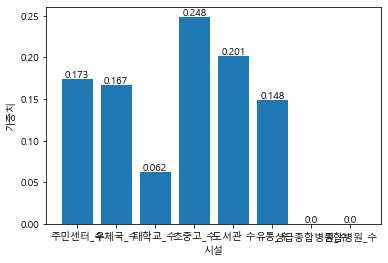

In [197]:
# feature별 가중치 시각화
plt.bar(x, y)
plt.xlabel('시설')
plt.ylabel('가중치')


for i, v in enumerate(x):
    plt.text(v, y[i],round(y[i],3),                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 10, 
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom', # verticalalignment (top, center, bottom)
            )    
    
plt.savefig('AHP_결과/사천시_AHP_막대그래프',dpi=300) # 막대그래프 결과를 저장
plt.show()

In [198]:
# 사천시 인프라 데이터 불러오기
초중고 = pd.read_excel('../전처리된데이터/AHP/사천시_읍면동_인프라/사천시_읍면동_초중고.xlsx')
대학교 = pd.read_excel('../전처리된데이터/AHP/사천시_읍면동_인프라/사천시_읍면동_대학교.xlsx')
도서관 = pd.read_excel('../전처리된데이터/AHP/사천시_읍면동_인프라/사천시_읍면동_도서관.xlsx.')
상급종합병원 = pd.read_excel('../전처리된데이터/AHP/사천시_읍면동_인프라/사천시_읍면동_상급종합병원.xlsx')
종합병원 = pd.read_excel('../전처리된데이터/AHP/사천시_읍면동_인프라/사천시_읍면동_종합병원.xlsx')
우체국 = pd.read_excel('../전처리된데이터/AHP/사천시_읍면동_인프라/사천시_읍면동_우체국.xlsx')
유통 = pd.read_excel('../전처리된데이터/AHP/사천시_읍면동_인프라/사천시_읍면동_유통.xlsx')
주민센터 = pd.read_excel('../전처리된데이터/AHP/사천시_읍면동_인프라/사천시_읍면동_주민센터.xlsx')

In [199]:
# column 이름 변경
초중고.rename(columns = {'NUMPOINTS' : '초중고_수'}, inplace = True)
초중고 = 초중고[['EMD_NM', '초중고_수']]
초중고.head()

,EMD_NM,초중고_수
0,와룡동,0
1,벌리동,10
2,곤양면,6
3,마도동,0
4,죽림동,2


In [200]:
대학교.rename(columns = {'Unnamed: 0' : 'EMD_CD', 'NUMPOINTS' : '대학교_수'}, inplace = True)
대학교 = 대학교[['EMD_NM', '대학교_수']]
대학교.head()

,EMD_NM,대학교_수
0,와룡동,0
1,벌리동,0
2,곤양면,0
3,마도동,0
4,죽림동,0


In [201]:
도서관.rename(columns = {'NUMPOINTS_SUM' : '도서관_수'}, inplace = True)
도서관 = 도서관[['EMD_NM', '도서관_수']]
도서관.head()

,EMD_NM,도서관_수
0,와룡동,0
1,벌리동,1
2,곤양면,1
3,마도동,0
4,죽림동,0


In [202]:
상급종합병원.rename(columns = {'NUMPOINTS' : '상급종합병원_수'}, inplace = True)
상급종합병원 = 상급종합병원[['EMD_NM', '상급종합병원_수']]
상급종합병원.head()

,EMD_NM,상급종합병원_수
0,와룡동,0
1,벌리동,0
2,곤양면,0
3,마도동,0
4,죽림동,0


In [203]:
종합병원.rename(columns = {'NUMPOINTS' : '종합병원_수'}, inplace = True)
종합병원 = 종합병원[['EMD_NM', '종합병원_수']]
종합병원.head()

,EMD_NM,종합병원_수
0,와룡동,0
1,벌리동,0
2,곤양면,0
3,마도동,0
4,죽림동,0


In [204]:
우체국.rename(columns = {'NUMPOINTS' : '우체국_수'}, inplace = True)
우체국 = 우체국[['EMD_NM', '우체국_수']]
우체국.head()

,EMD_NM,우체국_수
0,와룡동,0
1,벌리동,1
2,곤양면,1
3,마도동,0
4,죽림동,0


In [205]:
유통.rename(columns = {'NUMPOINTS' : '유통_수'}, inplace = True)
유통 = 유통[['EMD_NM', '유통_수']]
유통.head()

,EMD_NM,유통_수
0,와룡동,0
1,벌리동,3
2,곤양면,0
3,마도동,0
4,죽림동,0


In [206]:
주민센터.rename(columns = {'NUMPOINTS' : '주민센터_수'}, inplace = True)
주민센터 = 주민센터[['EMD_NM', '주민센터_수']]
주민센터.head()

,EMD_NM,주민센터_수
0,와룡동,0
1,벌리동,1
2,곤양면,1
3,마도동,0
4,죽림동,0


merge (EMD_NM 기준)

In [207]:
tmp1 = pd.merge(초중고, 대학교, on = 'EMD_NM', how = 'inner')
tmp1.head()

,EMD_NM,초중고_수,대학교_수
0,와룡동,0,0
1,벌리동,10,0
2,곤양면,6,0
3,마도동,0,0
4,죽림동,2,0


In [208]:
tmp2 = pd.merge(도서관, 상급종합병원, on = 'EMD_NM', how = 'inner')
tmp2.head()

,EMD_NM,도서관_수,상급종합병원_수
0,와룡동,0,0
1,벌리동,1,0
2,곤양면,1,0
3,마도동,0,0
4,죽림동,0,0


In [209]:
tmp3 = pd.merge(종합병원, 우체국, on = 'EMD_NM', how = 'inner')
tmp3.head()

,EMD_NM,종합병원_수,우체국_수
0,와룡동,0,0
1,벌리동,0,1
2,곤양면,0,1
3,마도동,0,0
4,죽림동,0,0


In [210]:
tmp4 = pd.merge(유통, 주민센터, on = 'EMD_NM', how = 'inner')
tmp4.head()

,EMD_NM,유통_수,주민센터_수
0,와룡동,0,0
1,벌리동,3,1
2,곤양면,0,1
3,마도동,0,0
4,죽림동,0,0


In [211]:
tmp11 = pd.merge(tmp1, tmp2, on = 'EMD_NM', how = 'inner')
tmp11.head()

,EMD_NM,초중고_수,대학교_수,도서관_수,상급종합병원_수
0,와룡동,0,0,0,0
1,벌리동,10,0,1,0
2,곤양면,6,0,1,0
3,마도동,0,0,0,0
4,죽림동,2,0,0,0


In [212]:
tmp22 =tmp22 = pd.merge(tmp3, tmp4, on = 'EMD_NM', how = 'inner')
tmp22.head()

,EMD_NM,종합병원_수,우체국_수,유통_수,주민센터_수
0,와룡동,0,0,0,0
1,벌리동,0,1,3,1
2,곤양면,0,1,0,1
3,마도동,0,0,0,0
4,죽림동,0,0,0,0


In [213]:
tmp_a = pd.merge(tmp11, tmp22, on = 'EMD_NM', how = 'inner')
tmp_a.head()

,EMD_NM,초중고_수,대학교_수,도서관_수,상급종합병원_수,종합병원_수,우체국_수,유통_수,주민센터_수
0,와룡동,0,0,0,0,0,0,0,0
1,벌리동,10,0,1,0,0,1,3,1
2,곤양면,6,0,1,0,0,1,0,1
3,마도동,0,0,0,0,0,0,0,0
4,죽림동,2,0,0,0,0,0,0,0


In [214]:
인프라시설 = tmp_a
인프라시설.head()

,EMD_NM,초중고_수,대학교_수,도서관_수,상급종합병원_수,종합병원_수,우체국_수,유통_수,주민센터_수
0,와룡동,0,0,0,0,0,0,0,0
1,벌리동,10,0,1,0,0,1,3,1
2,곤양면,6,0,1,0,0,1,0,1
3,마도동,0,0,0,0,0,0,0,0
4,죽림동,2,0,0,0,0,0,0,0


In [215]:
인프라시설.rename(columns = {'EMD_NM' : '사천시'}, inplace = True)

In [216]:
# 읍면동별 사천시 인프라시설 수 저장
사천시_인프라시설 = 인프라시설
사천시_인프라시설

,사천시,초중고_수,대학교_수,도서관_수,상급종합병원_수,종합병원_수,우체국_수,유통_수,주민센터_수
0,와룡동,0,0,0,0,0,0,0,0
1,벌리동,10,0,1,0,0,1,3,1
2,곤양면,6,0,1,0,0,1,0,1
3,마도동,0,0,0,0,0,0,0,0
4,죽림동,2,0,0,0,0,0,0,0
5,봉남동,2,0,0,0,0,0,0,0
6,좌룡동,2,0,1,0,0,0,2,0
7,동동,0,0,0,0,0,0,0,0
8,백천동,0,0,0,0,0,0,0,0
9,노룡동,0,0,0,0,0,0,0,0


로그 변환 (Log Scaling)

In [217]:
사천시_인프라시설_log = 사천시_인프라시설

In [218]:
사천시_인프라시설_log.columns

Index(['사천시', '초중고_수', '대학교_수', '도서관_수', '상급종합병원_수', '종합병원_수', '우체국_수', '유통_수',
       '주민센터_수'],
      dtype='object')

In [219]:
# 각 인프라시설 수를 log 변환
사천시_인프라시설_log['초중고_수'] = np.log1p(사천시_인프라시설_log['초중고_수'])
사천시_인프라시설_log['대학교_수'] = np.log1p(사천시_인프라시설_log['대학교_수'])
사천시_인프라시설_log['도서관_수'] = np.log1p(사천시_인프라시설_log['도서관_수'])
사천시_인프라시설_log['상급종합병원_수'] = np.log1p(사천시_인프라시설_log['상급종합병원_수'])
사천시_인프라시설_log['종합병원_수'] = np.log1p(사천시_인프라시설_log['종합병원_수'])
사천시_인프라시설_log['우체국_수'] = np.log1p(사천시_인프라시설_log['우체국_수'])
사천시_인프라시설_log['유통_수'] = np.log1p(사천시_인프라시설_log['유통_수'])
사천시_인프라시설_log['주민센터_수'] = np.log1p(사천시_인프라시설_log['주민센터_수'])

In [220]:
사천시_인프라시설_log

,사천시,초중고_수,대학교_수,도서관_수,상급종합병원_수,종합병원_수,우체국_수,유통_수,주민센터_수
0,와룡동,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,벌리동,2.397895,0.000000,0.693147,0.0,0.0,0.693147,1.386294,0.693147
2,곤양면,1.945910,0.000000,0.693147,0.0,0.0,0.693147,0.000000,0.693147
3,마도동,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4,죽림동,1.098612,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
5,봉남동,1.098612,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
6,좌룡동,1.098612,0.000000,0.693147,0.0,0.0,0.000000,1.098612,0.000000
7,동동,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
8,백천동,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
9,노룡동,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000


In [221]:
# 사천시_인프라시설 파일 반환
사천시_인프라시설.to_csv('AHP_결과/사천시_인프라시설.csv')

In [222]:
# 사천시 가중치 데이터 불러오기
사천 = pd.read_csv('AHP_결과/사천시_가중치.csv', encoding = 'cp949')
사천

,Unnamed: 0,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
0,주민센터_수,1.000000,0.947157,0.255958,1.613503,1.217052,0.811368,0.0,0.0
1,우체국_수,1.055791,1.000000,0.270238,1.703522,1.284952,0.856635,0.0,0.0
2,대학교_수,3.906891,3.700440,1.000000,6.303781,4.754888,3.169925,0.0,0.0
3,초중고_수,0.619769,0.587019,0.158635,1.000000,0.754291,0.502861,0.0,0.0
4,도서관 수,0.821658,0.778239,0.210310,1.325748,1.000000,0.666667,0.0,0.0
5,유통_수,1.232487,1.167359,0.315465,1.988621,1.500000,1.000000,0.0,0.0
6,상급종합병원_수,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
7,종합병원_수,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
8,기하평균,1.126261,1.081323,0.405290,1.612377,1.305031,0.962836,0.0,0.0
9,가중치,0.173455,0.166534,0.062418,0.248321,0.200987,0.148286,0.0,0.0


In [223]:
# 가중치 행만 추출
사천_가중치 = 사천[사천['Unnamed: 0'] == '가중치']
사천_가중치

,Unnamed: 0,주민센터_수,우체국_수,대학교_수,초중고_수,도서관 수,유통_수,상급종합병원_수,종합병원_수
9,가중치,0.173455,0.166534,0.062418,0.248321,0.200987,0.148286,0.0,0.0


In [224]:
# column 이름 변경
사천_가중치 = 사천_가중치.rename(columns = {'Unnamed: 0' : '사천시', '도서관 수' : '도서관_수'})
사천_가중치

,사천시,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수
9,가중치,0.173455,0.166534,0.062418,0.248321,0.200987,0.148286,0.0,0.0


In [225]:
# 사천시로 index 설정
사천_가중치.set_index('사천시', inplace = True)

In [226]:
사천_가중치.columns

Index(['주민센터_수', '우체국_수', '대학교_수', '초중고_수', '도서관_수', '유통_수', '상급종합병원_수',
       '종합병원_수'],
      dtype='object')

In [227]:
사천_가중치

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수
사천시,,,,,,,,
가중치,0.173455,0.166534,0.062418,0.248321,0.200987,0.148286,0.0,0.0


In [228]:
columns_cnt = len(사천_가중치.columns)
columns_cnt

8

### 사천시_인프라시설 - 시설log

In [229]:
# 사천시 인프라시설 데이터 불러오기
사천시_인프라시설 = pd.read_csv('AHP_결과/사천시_인프라시설.csv')
사천시_인프라시설

,Unnamed: 0,사천시,초중고_수,대학교_수,도서관_수,상급종합병원_수,종합병원_수,우체국_수,유통_수,주민센터_수
0,0,와룡동,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,1,벌리동,2.397895,0.000000,0.693147,0.0,0.0,0.693147,1.386294,0.693147
2,2,곤양면,1.945910,0.000000,0.693147,0.0,0.0,0.693147,0.000000,0.693147
3,3,마도동,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4,4,죽림동,1.098612,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
5,5,봉남동,1.098612,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
6,6,좌룡동,1.098612,0.000000,0.693147,0.0,0.0,0.000000,1.098612,0.000000
7,7,동동,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
8,8,백천동,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
9,9,노룡동,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000


In [230]:
# 필요한 column만 추출
사천시_인프라시설 = 사천시_인프라시설[['사천시', '주민센터_수', '우체국_수', '대학교_수', '초중고_수', '도서관_수', '유통_수', '상급종합병원_수','종합병원_수']]
사천시_인프라시설

,사천시,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수
0,와룡동,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,벌리동,0.693147,0.693147,0.000000,2.397895,0.693147,1.386294,0.0,0.0
2,곤양면,0.693147,0.693147,0.000000,1.945910,0.693147,0.000000,0.0,0.0
3,마도동,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,죽림동,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.0,0.0
5,봉남동,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.0,0.0
6,좌룡동,0.000000,0.000000,0.000000,1.098612,0.693147,1.098612,0.0,0.0
7,동동,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
8,백천동,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
9,노룡동,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [231]:
# 사천시 동 추출 후 저장
사천시_동 = 사천시_인프라시설[['사천시']]
사천시_동.head()

,사천시
0,와룡동
1,벌리동
2,곤양면
3,마도동
4,죽림동


In [232]:
사천시_인프라시설.columns

Index(['사천시', '주민센터_수', '우체국_수', '대학교_수', '초중고_수', '도서관_수', '유통_수', '상급종합병원_수',
       '종합병원_수'],
      dtype='object')

In [233]:
사천시_인프라시설.set_index('사천시', inplace = True)

In [234]:
사천시_인프라시설.head()

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수
사천시,,,,,,,,
와룡동,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
벌리동,0.693147,0.693147,0.0,2.397895,0.693147,1.386294,0.0,0.0
곤양면,0.693147,0.693147,0.0,1.945910,0.693147,0.000000,0.0,0.0
마도동,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
죽림동,0.000000,0.000000,0.0,1.098612,0.000000,0.000000,0.0,0.0


In [235]:
지역cnt = len(사천시_인프라시설)
지역cnt

35

## Ⅱ. 인프라시설 * 지역별 가중치 

#### (가장 점수가 높은 동을 선정하기)

In [236]:
사천시가중치 = pd.DataFrame(index = range(0, 지역cnt), columns = ['주민센터_수', '우체국_수', '대학교_수', '초중고_수', '도서관_수', '유통_수', '상급종합병원_수', '종합병원_수'])

In [237]:
# 사천시 읍면동별 (가중치 * 인프라시설 수) 를 통해 AHP 분석 
for i in range(지역cnt):
    for j in range(columns_cnt):
        사천시가중치.iloc[i, j] = 사천_가중치.iloc[0, j] * 사천시_인프라시설.iloc[i, j]

In [238]:
사천시가중치.head()

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.12023,0.115432,0.0,0.595447,0.139313,0.205568,0.0,0.0
2,0.12023,0.115432,0.0,0.48321,0.139313,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.272808,0.0,0.0,0.0,0.0


In [239]:
사천시가중치['sum_a'] = 사천시가중치.sum(axis = 1)

In [240]:
사천시가중치.head()

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수,sum_a
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.12023,0.115432,0.0,0.595447,0.139313,0.205568,0.0,0.0,1.175990
2,0.12023,0.115432,0.0,0.48321,0.139313,0.0,0.0,0.0,0.858185
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.272808,0.0,0.0,0.0,0.0,0.272808


index 기준으로 merge (사천시_동, 사천시가중치)

In [241]:
사천시 = pd.merge(사천시_동, 사천시가중치, left_index=True, right_index=True, how='left')

In [242]:
사천시.head()

,사천시,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수,sum_a
0,와룡동,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,벌리동,0.12023,0.115432,0.0,0.595447,0.139313,0.205568,0.0,0.0,1.175990
2,곤양면,0.12023,0.115432,0.0,0.48321,0.139313,0.0,0.0,0.0,0.858185
3,마도동,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,죽림동,0.0,0.0,0.0,0.272808,0.0,0.0,0.0,0.0,0.272808


사천시_세부입지 (정렬)

In [243]:
사천시_세부입지 = 사천시.sort_values(by=["sum_a"], ascending=[False])

In [244]:
사천시_세부입지.set_index('사천시', inplace = True)

In [245]:
시설log_사천시_세부입지 = 사천시_세부입지

In [246]:
# 사천시 세부 입지 선정 결과 확인 (사천읍, 정동면, 벌리동)
시설log_사천시_세부입지

,주민센터_수,우체국_수,대학교_수,초중고_수,도서관_수,유통_수,상급종합병원_수,종합병원_수,sum_a
사천시,,,,,,,,,
사천읍,0.12023,0.182956,0.0,0.545617,0.278627,0.102784,0.0,0.0,1.230213
정동면,0.12023,0.115432,0.0,0.595447,0.278627,0.102784,0.0,0.0,1.212520
벌리동,0.12023,0.115432,0.0,0.595447,0.139313,0.205568,0.0,0.0,1.175990
사남면,0.12023,0.115432,0.0,0.399657,0.41794,0.0,0.0,0.0,1.053259
동금동,0.12023,0.115432,0.0,0.48321,0.139313,0.162908,0.0,0.0,1.021094
용현면,0.12023,0.115432,0.0,0.48321,0.278627,0.0,0.0,0.0,0.997499
곤양면,0.12023,0.115432,0.0,0.48321,0.139313,0.0,0.0,0.0,0.858185
서포면,0.12023,0.115432,0.0,0.399657,0.139313,0.0,0.0,0.0,0.774632
곤명면,0.12023,0.115432,0.0,0.399657,0.0,0.102784,0.0,0.0,0.738103


시설log-사천시_세부입지

In [247]:
# 사천시 세부입지 파일 반환
시설log_사천시_세부입지.to_csv('AHP_결과/사천시_세부입지.csv')